In [2]:
%matplotlib widget
import h5py as h5  #to open HDF type files
import numpy as np #to work with numeric data
import matplotlib.pyplot as plt #plotting
import pandas as pd

from scipy.ndimage import gaussian_filter, convolve
from skimage.morphology import closing, square

from skimage import io, filters, measure #select and treshold ROIs

import pandas as pd
from pandas.plotting import table
from docx import Document
from docx.shared import Inches
from docx.enum.table import WD_TABLE_ALIGNMENT
from docx.enum.text import WD_ALIGN_PARAGRAPH
from PIL import Image
import tifffile as tiff
import os


def generate_cutoffs(data):
    flat_sorted = np.sort(data.flatten())
    cutoffs = []
    while flat_sorted.any():
        differences = []
        if len(flat_sorted) == 1:
            break
        for index, value in enumerate(flat_sorted[:-1]):
            differences.append(flat_sorted[index+1]-value)
        
        cutoff = differences.index(max(differences))+1
        cutoffs.append(cutoff)
        flat_sorted = flat_sorted[:cutoff]
    return [(i/len(data.flatten()))*100 for i in cutoffs]

def optimal_cutoff(cutoffs):
    diff = []
    if len(cutoffs)>1:
        for index, value in enumerate(cutoffs[:-1]):
            diff.append(value - cutoffs[index+1])
        limit = diff.index(max(diff))
    else:
        limit = 0
   
    return cutoffs[limit]

In [2]:
import os 

data_sets = {}

for root, dirs, files in os.walk('..\\results\\results'):
    for file in files:
        if file.endswith('.h5'):
            a =  os.path.join(root, file)
            data_sets[int(a.split('_')[-2])] = a
            



In [3]:
data_sets = {34: '..\\results\\results\\scan34\\sdd13467\\xrf_flat_scan_34_aligned.h5',
 37: '..\\results\\results\\scan37\\sdd13467\\xrf_flat_scan_37_aligned.h5',
 47: '..\\results\\results\\scan47\\sdd13467\\xrf_flat_scan_47_aligned.h5',
 67: '..\\results\\results\\scan67\\sdd13467\\xrf_flat_scan_67_aligned.h5',
 72: '..\\results\\results\\scan72\\sdd13467\\xrf_flat_scan_72_aligned.h5',
 74: '..\\results\\results\\scan74\\sdd13467\\xrf_flat_scan_74_aligned.h5',
 84: '..\\results\\results\\scan84\\sdd13467\\xrf_flat_scan_84_aligned.h5',
 88: '..\\results\\results\\scan88\\sdd13467\\xrf_flat_scan_88_aligned.h5'}

In [2]:
# data_sets = {13:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan13\sdd12346\xrf_flat_scan_13_aligned.h5',
#             16: r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan16\sdd12346\xrf_flat_scan_16_aligned.h5',
#              20:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan20\sdd12346\xrf_flat_scan_20_aligned.h5',
#              25:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan25\sdd12346\xrf_flat_scan_25_aligned.h5',
#              28:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan28\sdd12346\xrf_flat_scan_28_aligned.h5',
#              30:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan30\sdd12346\xrf_flat_scan_30_aligned.h5',
#              41:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan41\sdd12346\xrf_flat_scan_41_aligned.h5',
#              47:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan47\sdd12346\xrf_flat_scan_47_aligned.h5',
#              56:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan56\sdd12346\xrf_flat_scan_56_aligned.h5',
#              61:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan61\sdd12346\xrf_flat_scan_61_aligned.h5',
#              67:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan67\sdd12346\xrf_flat_scan_67_aligned.h5',
#              73:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan73\sdd12346\xrf_flat_scan_73_aligned.h5',
#              77:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan77\sdd12346\xrf_flat_scan_77_aligned.h5',
#              82:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan82\sdd12346\xrf_flat_scan_82_aligned.h5',
#              87:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan87\sdd12346\xrf_flat_scan_87_aligned.h5',
#              94:r'C:\Users\mates\OneDrive - elte.hu\University\Experiments\Trieste\2024\results\results\scan94\sdd12346\xrf_flat_scan_94_aligned.h5',
#             }

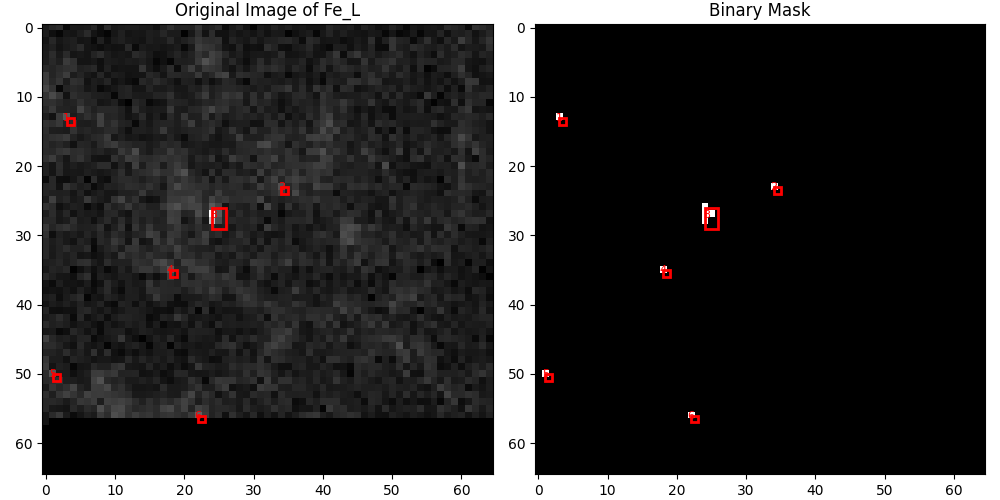

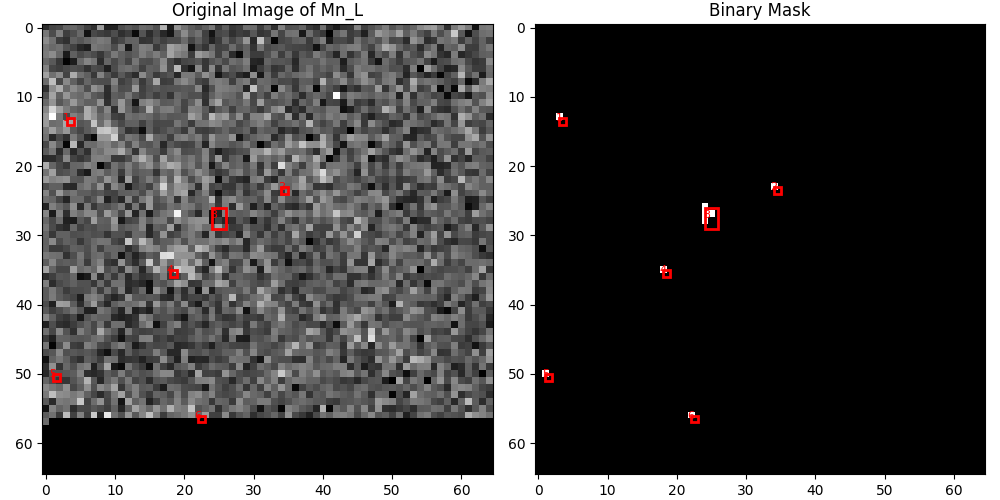

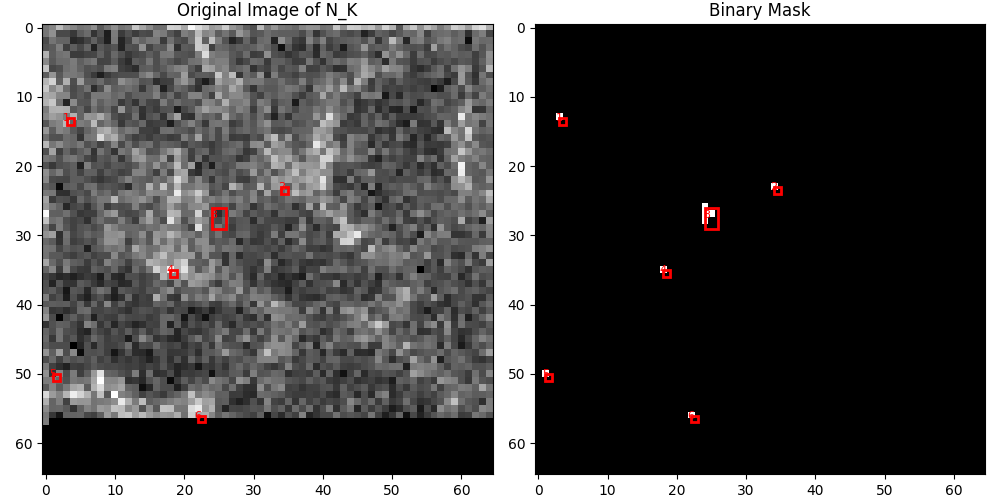

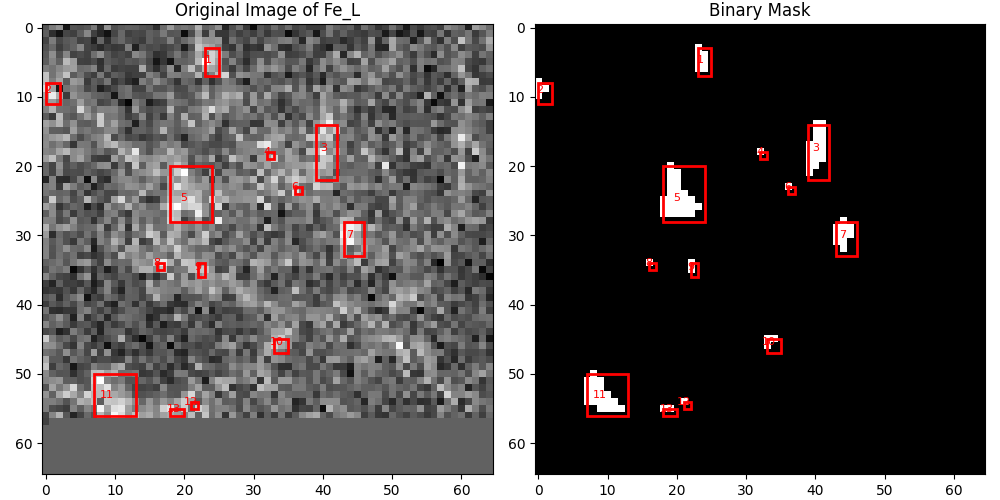

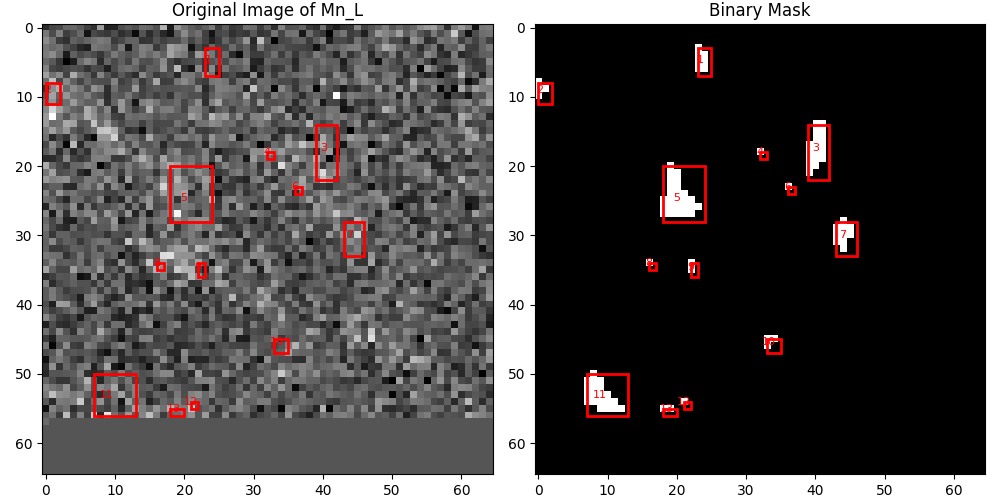

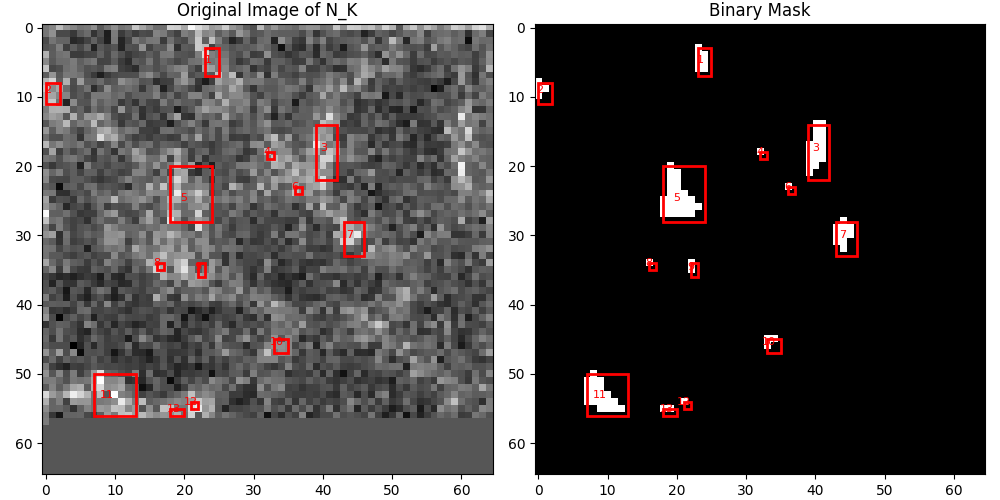

C:\Users\mates\AppData\Local\Temp\ipykernel_14620\3780612254.py:259: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(f"{save_location}/{element}_map.tiff", np.array(maps[element]))
C:\Users\mates\AppData\Local\Temp\ipykernel_14620\3780612254.py:260: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(f"{save_location}/{element}_map2.tiff", np.array(maps_2[element]))


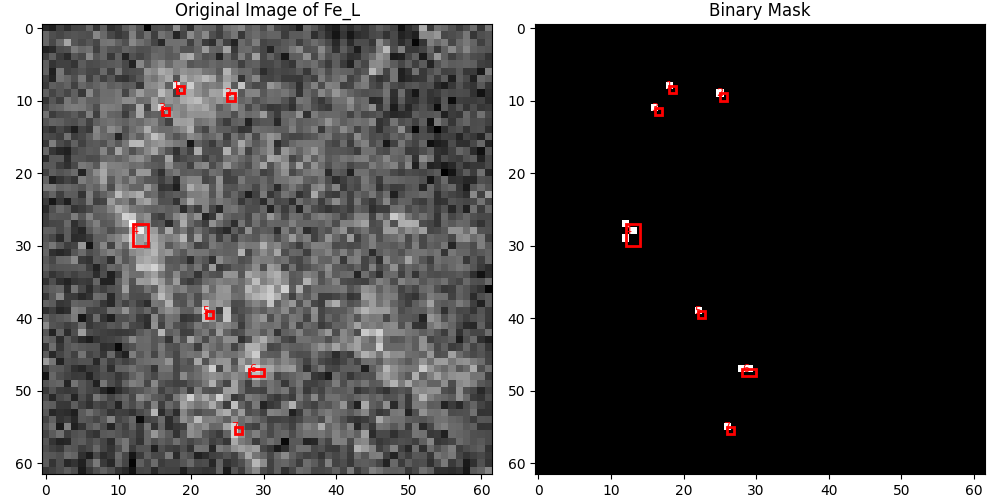

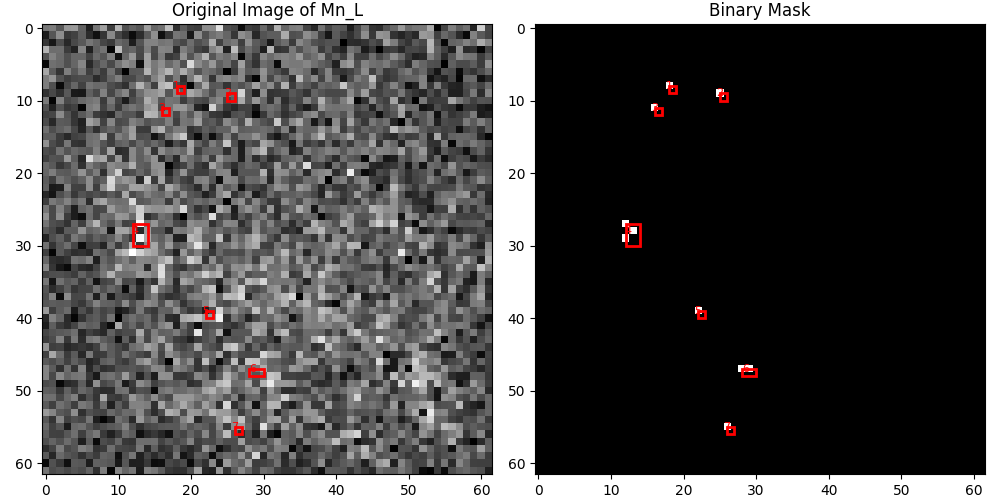

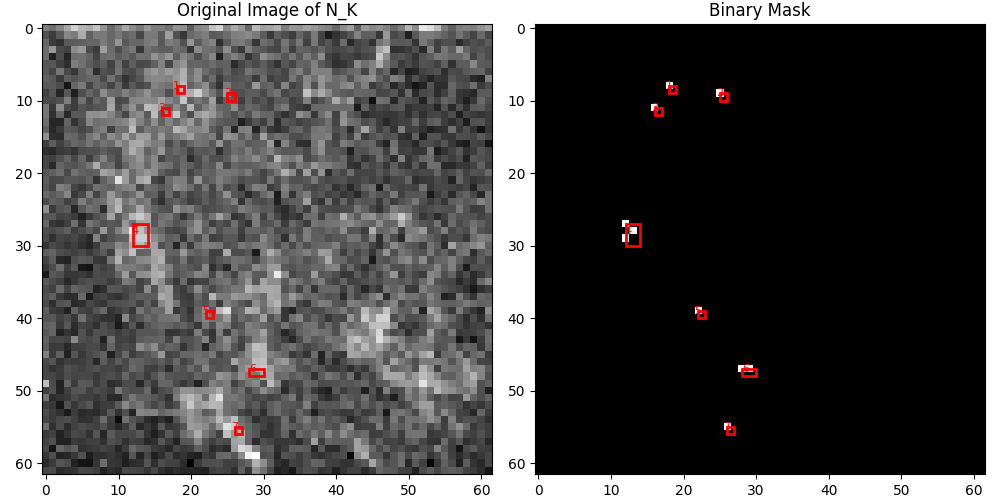

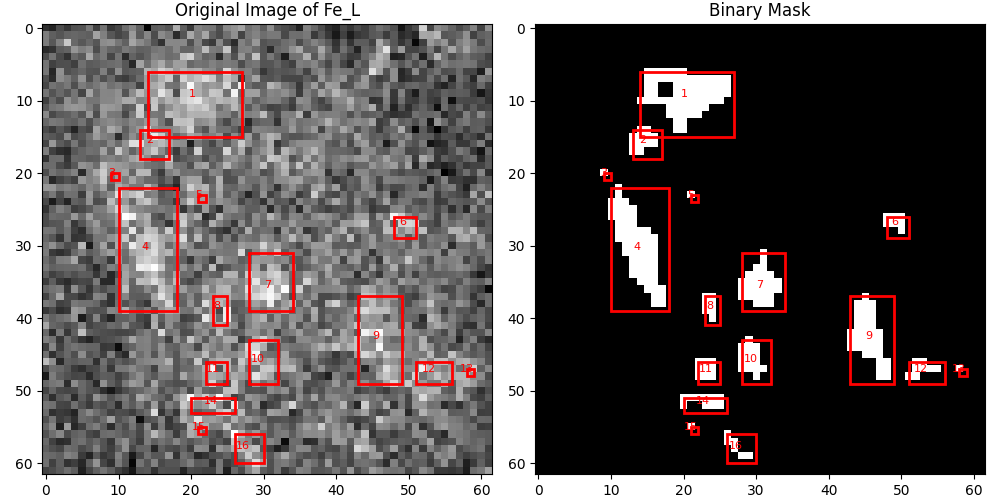

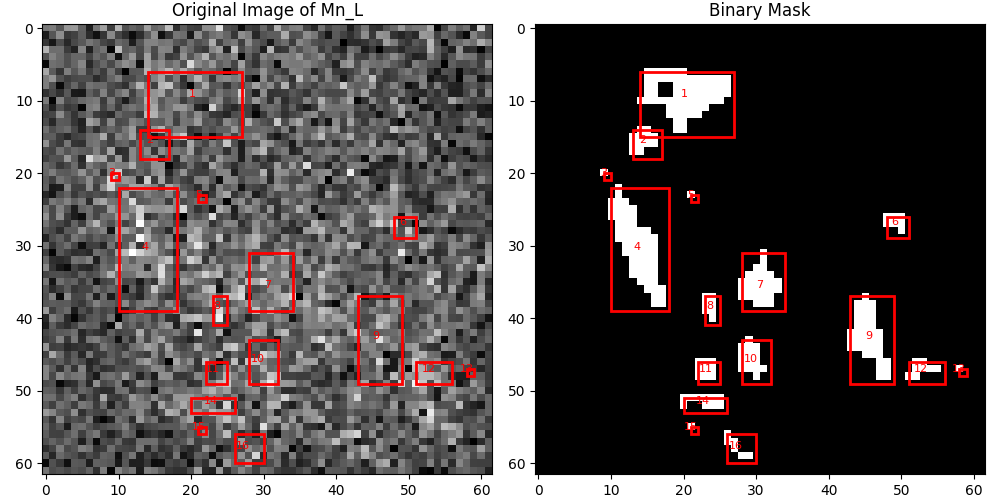

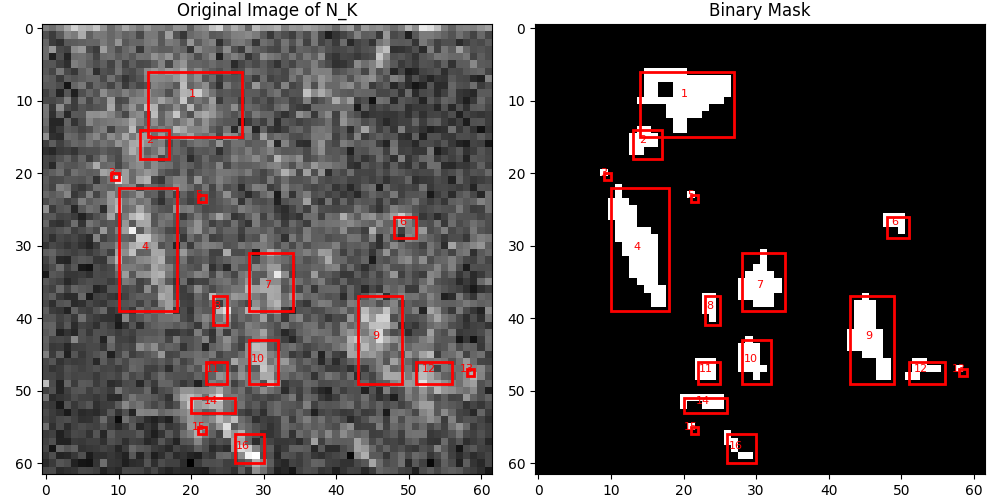

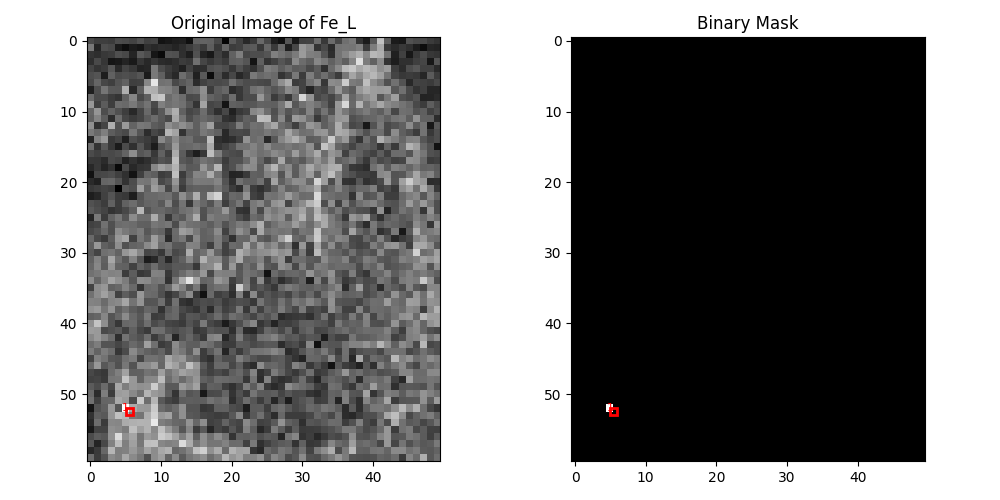

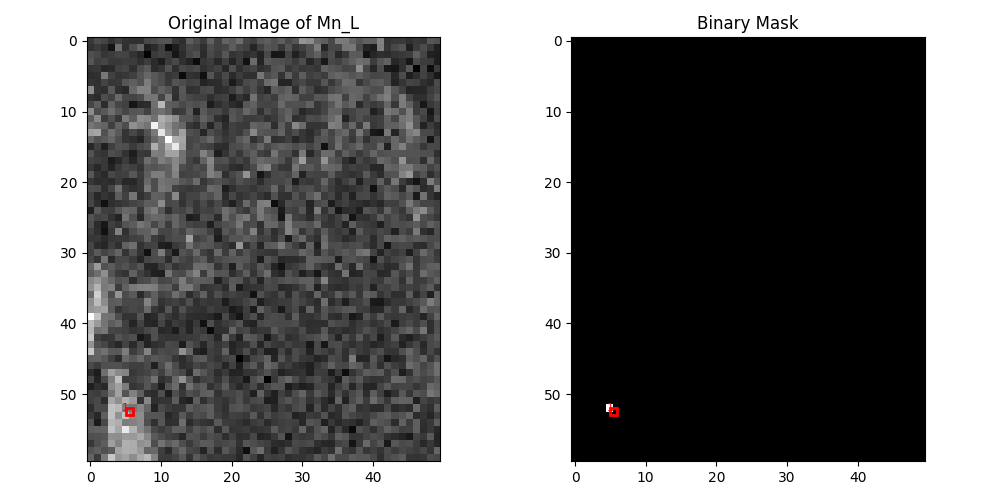

C:\Users\mates\AppData\Local\Temp\ipykernel_14620\3780612254.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1,2, figsize=(10,5))


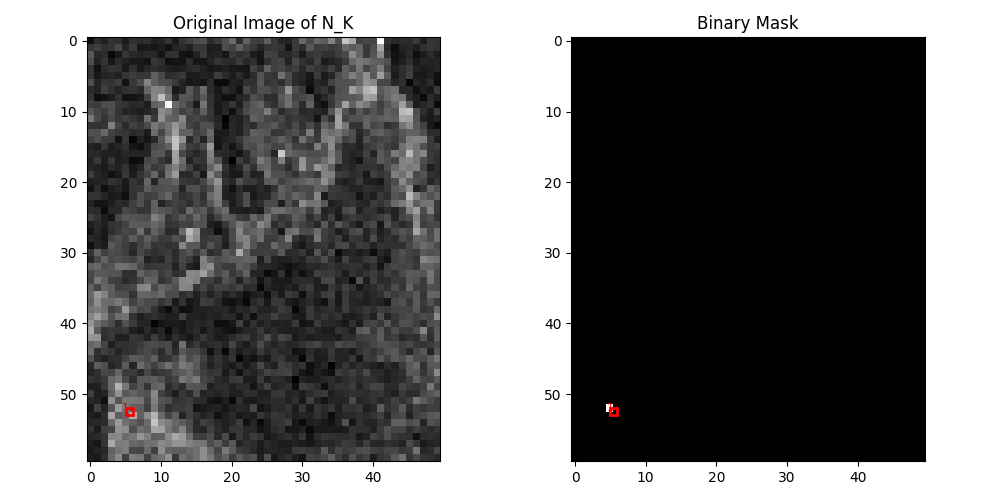

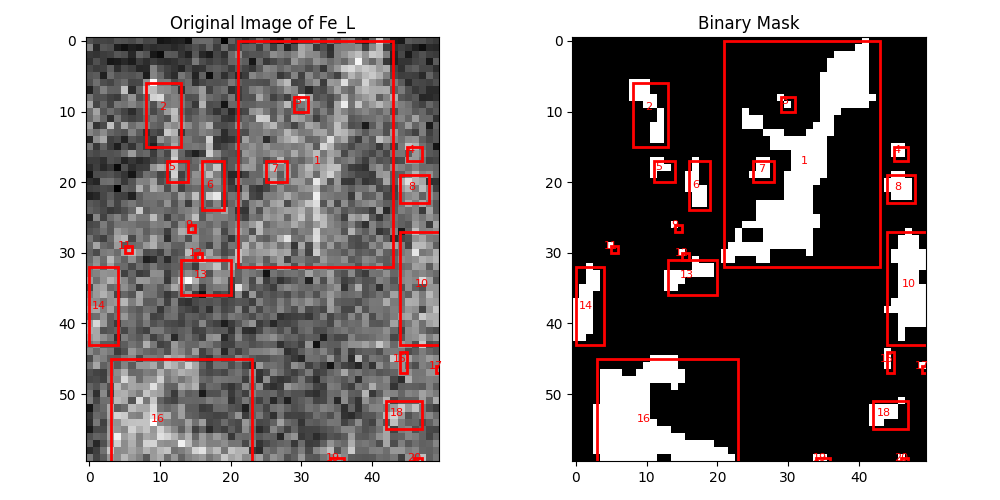

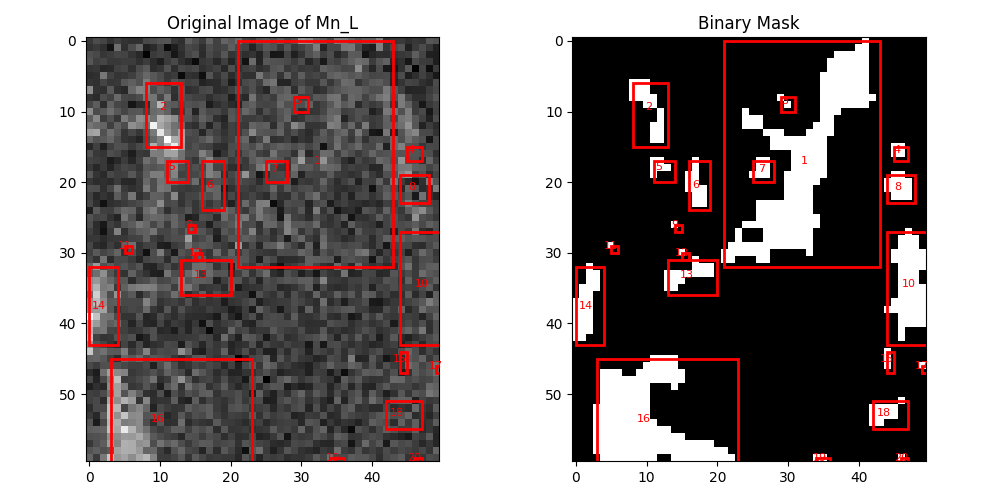

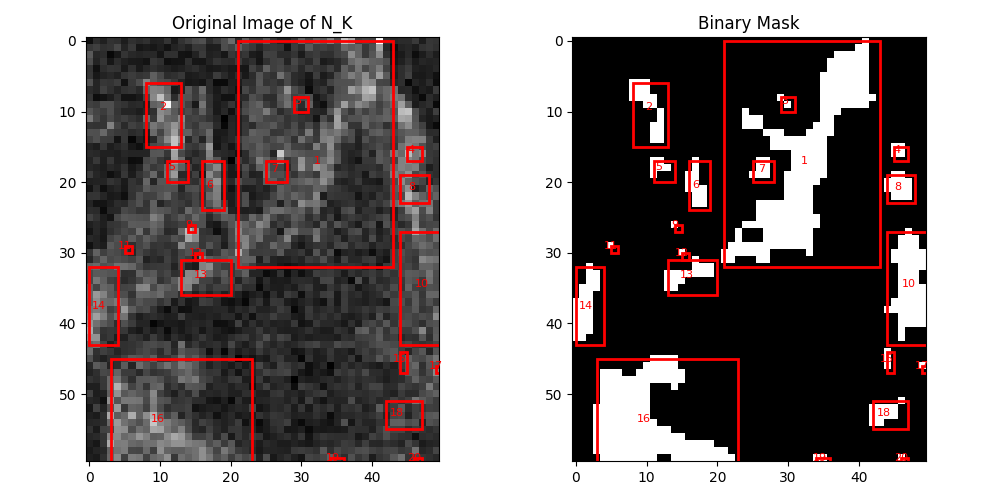

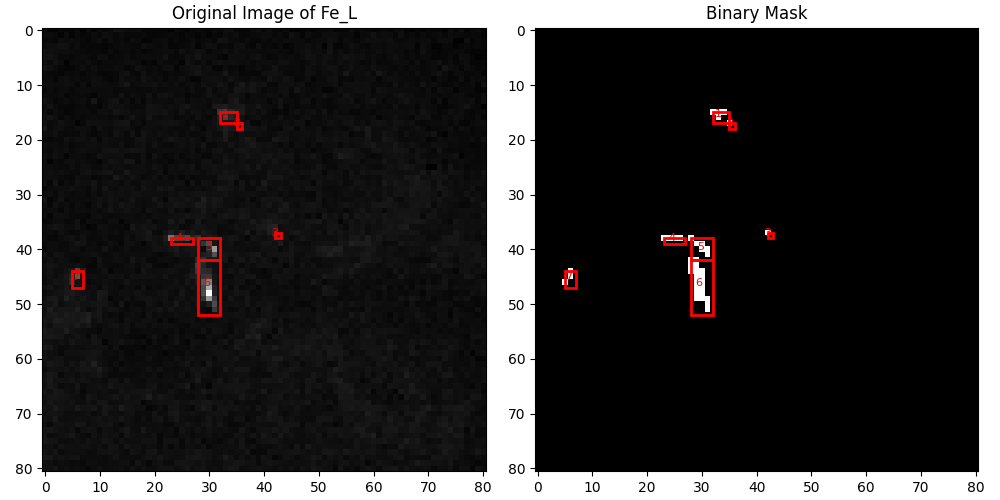

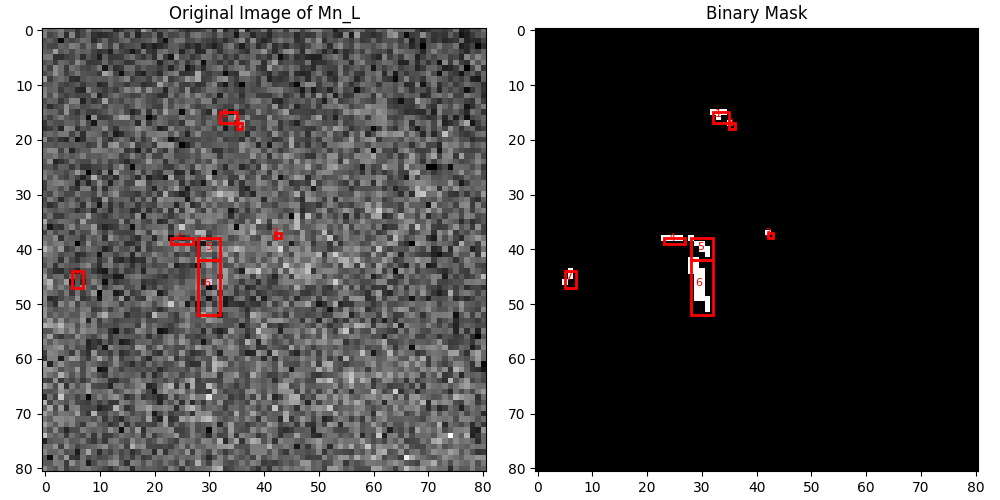

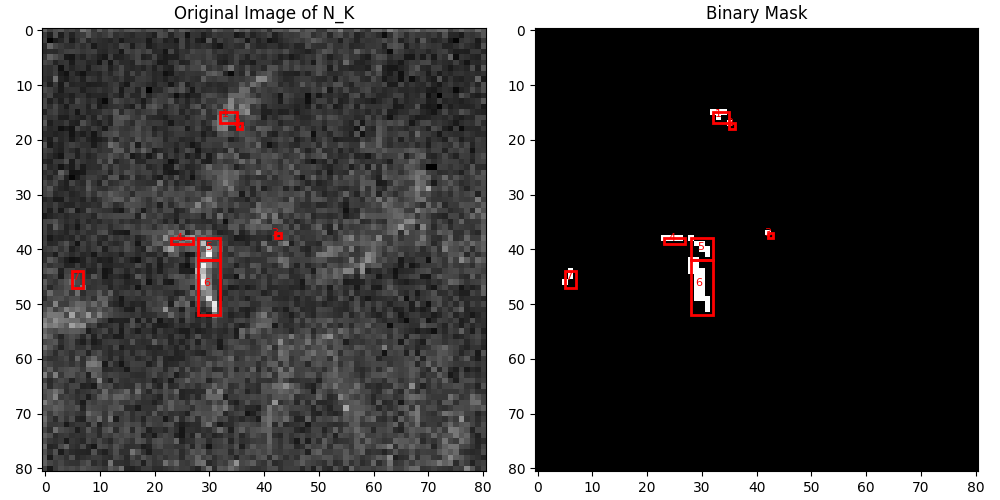

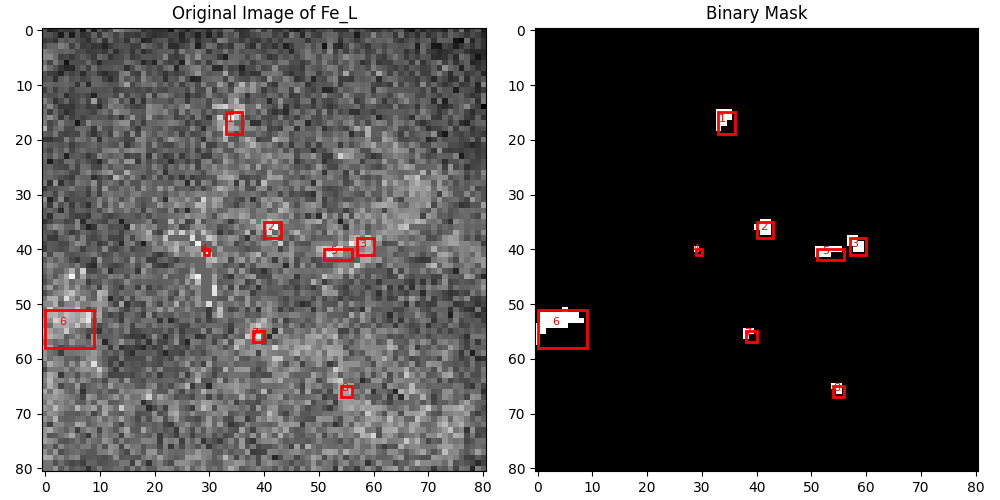

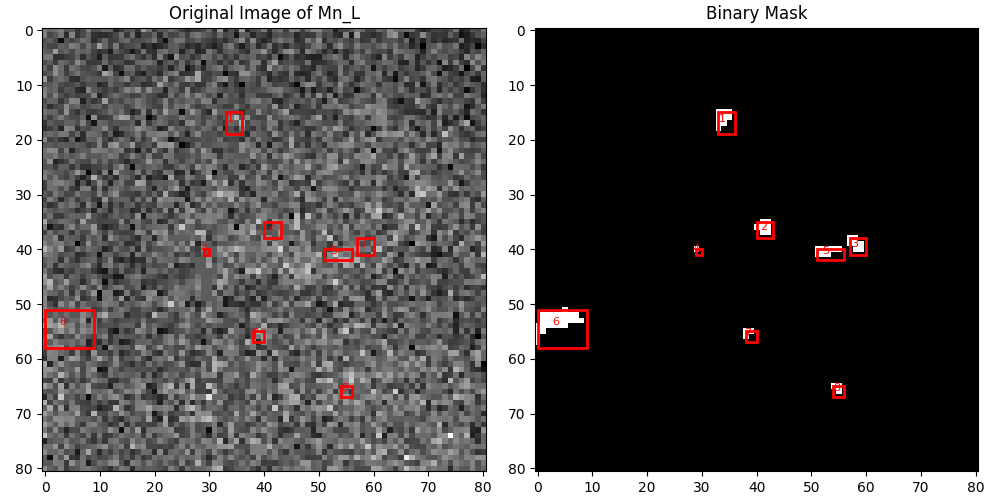

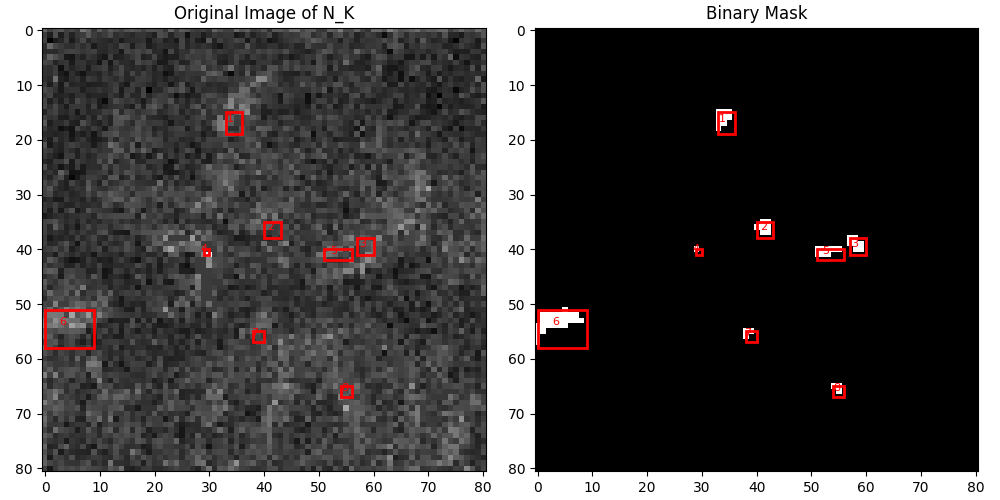

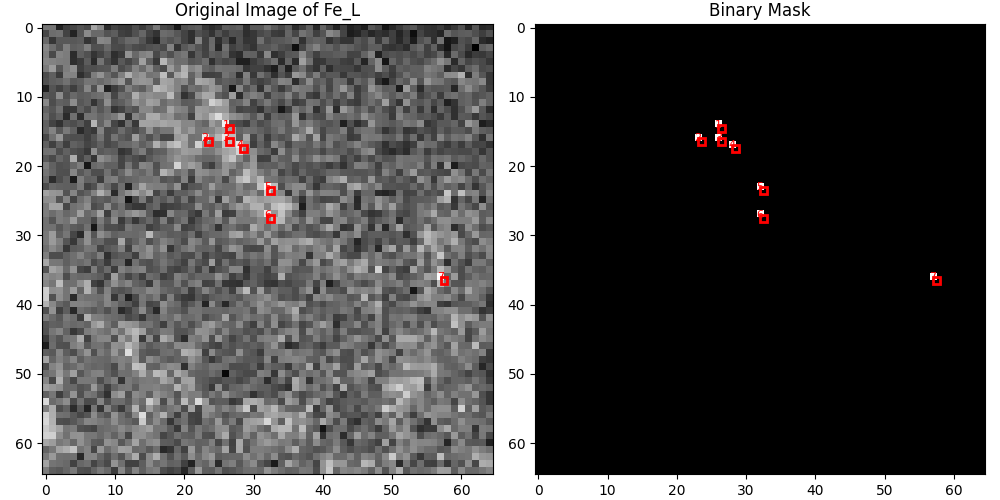

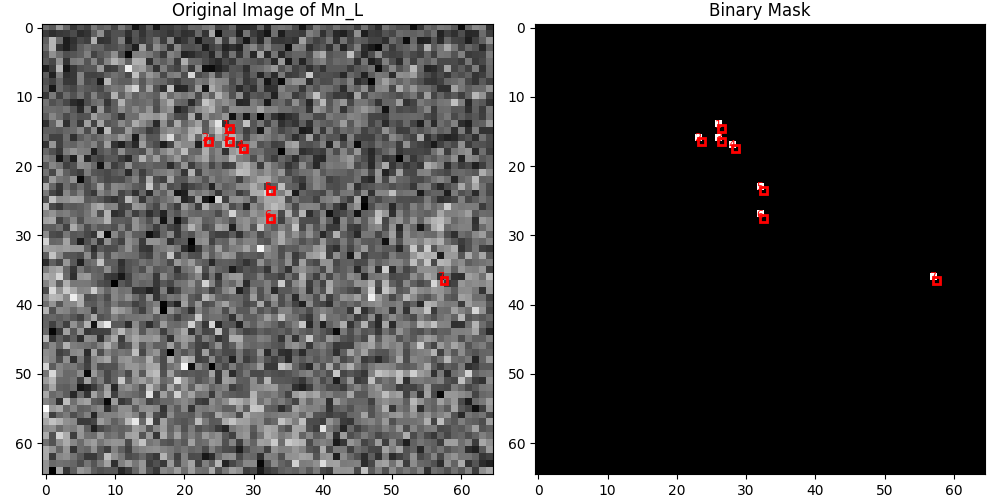

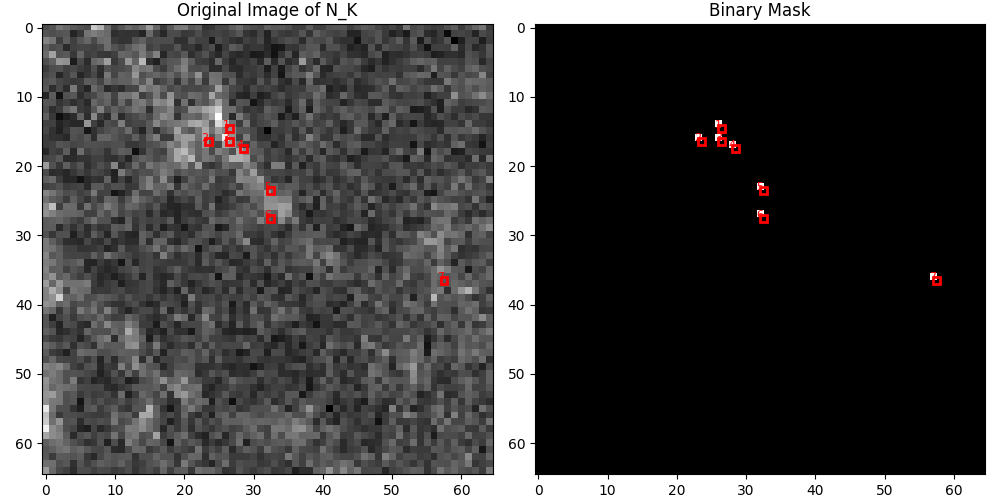

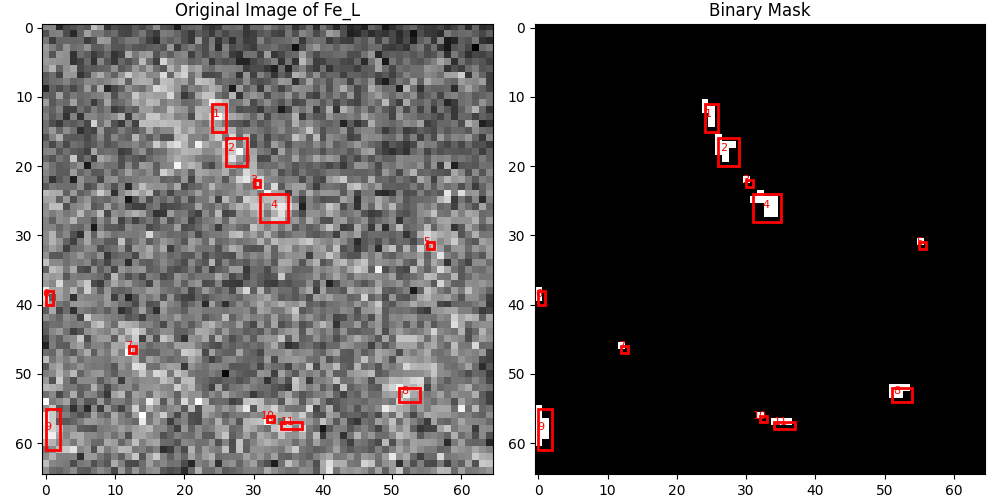

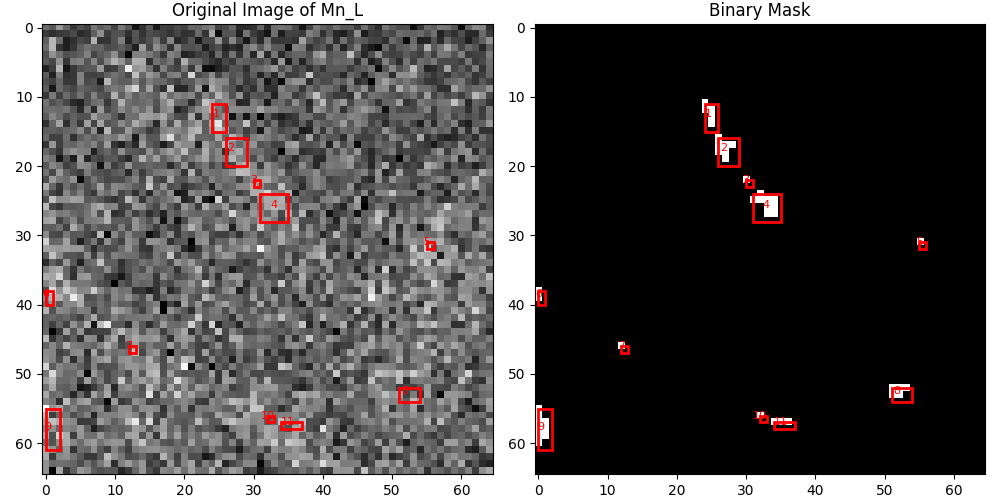

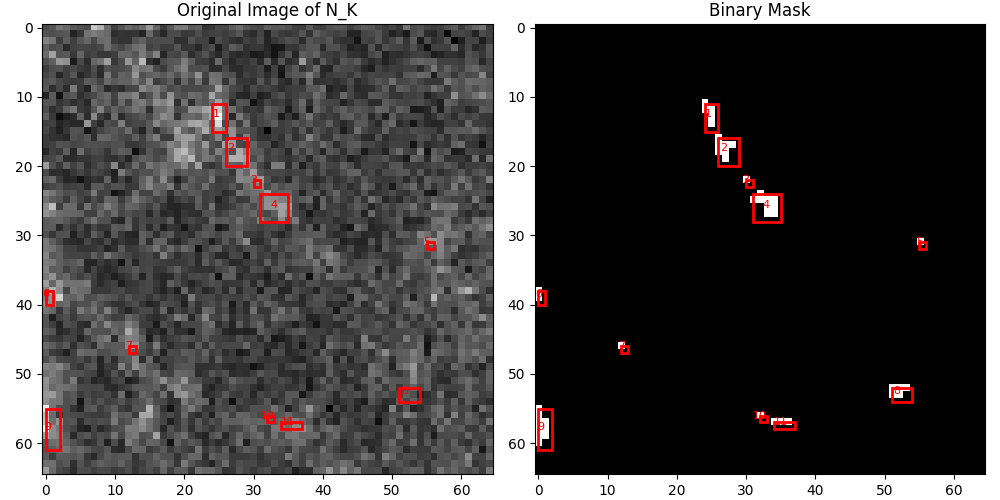

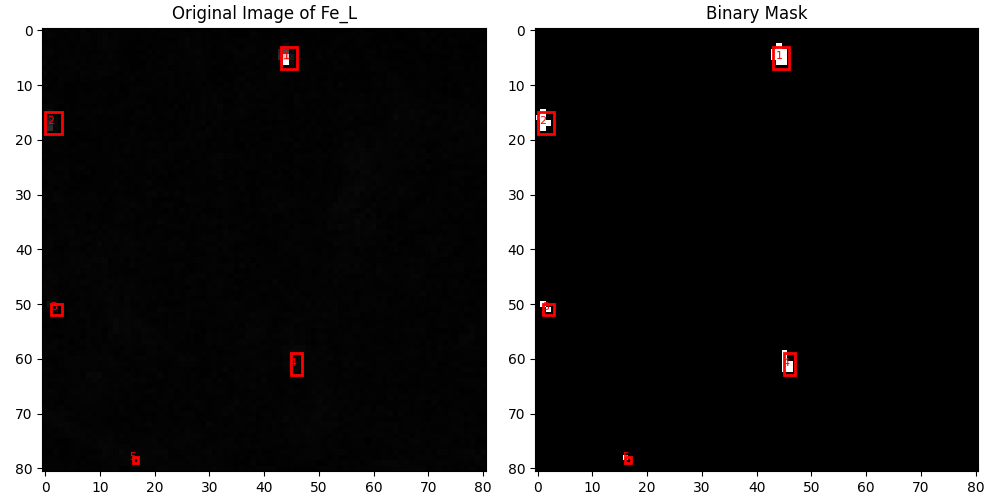

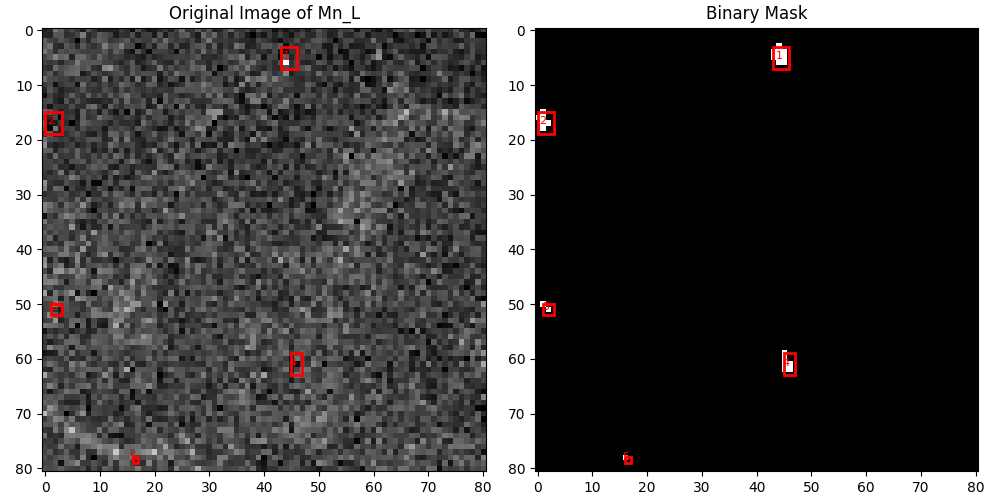

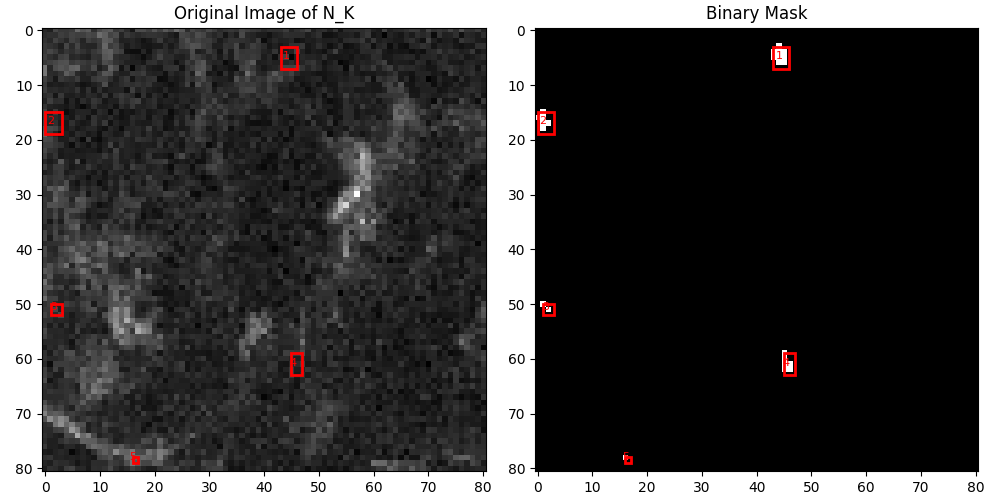

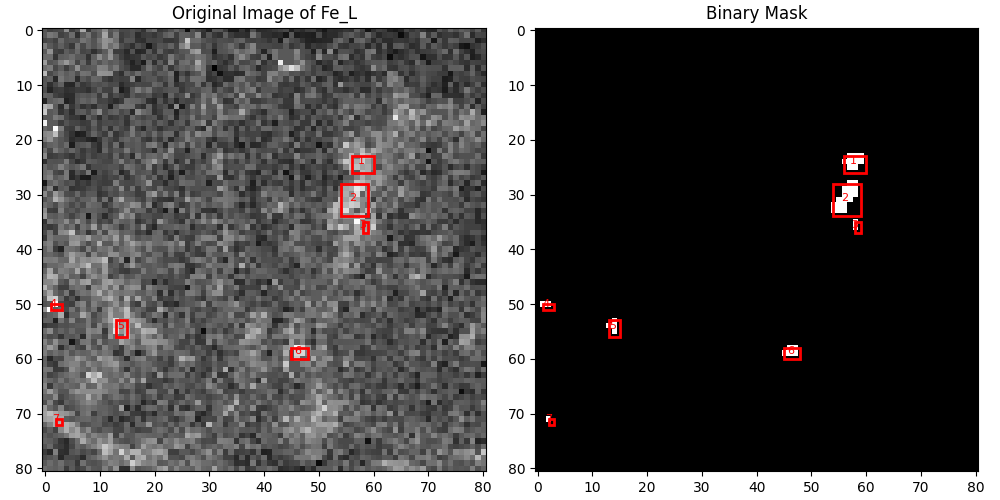

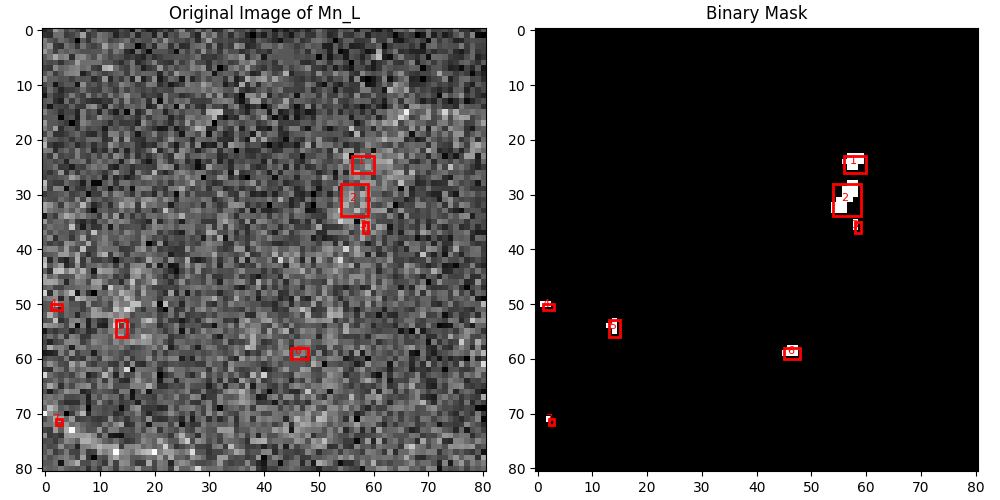

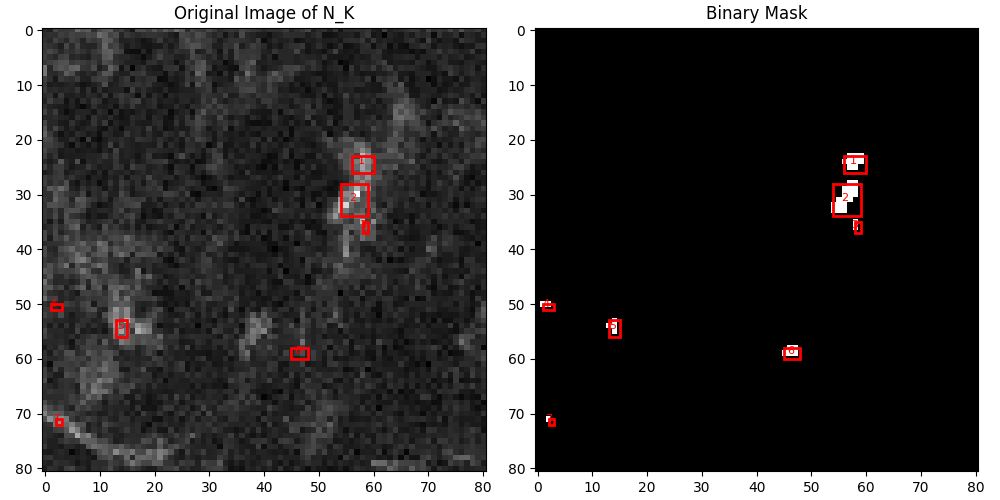

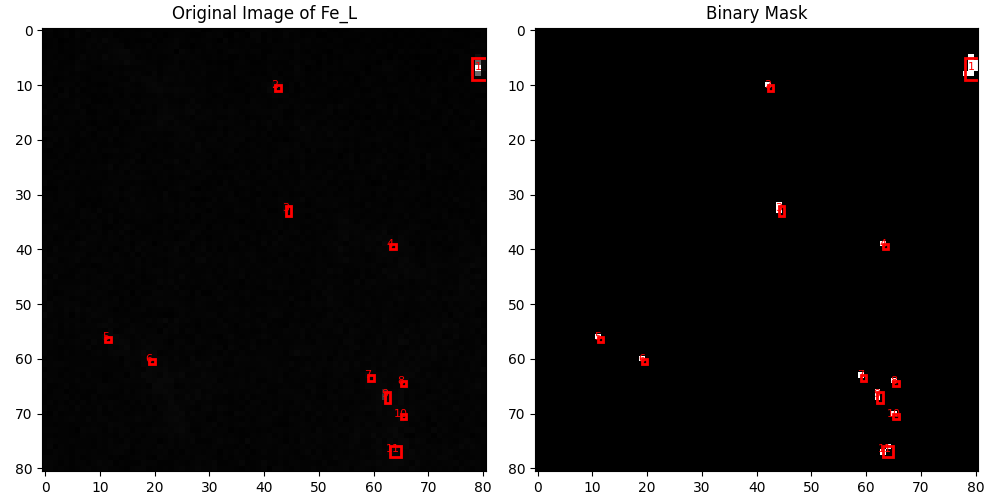

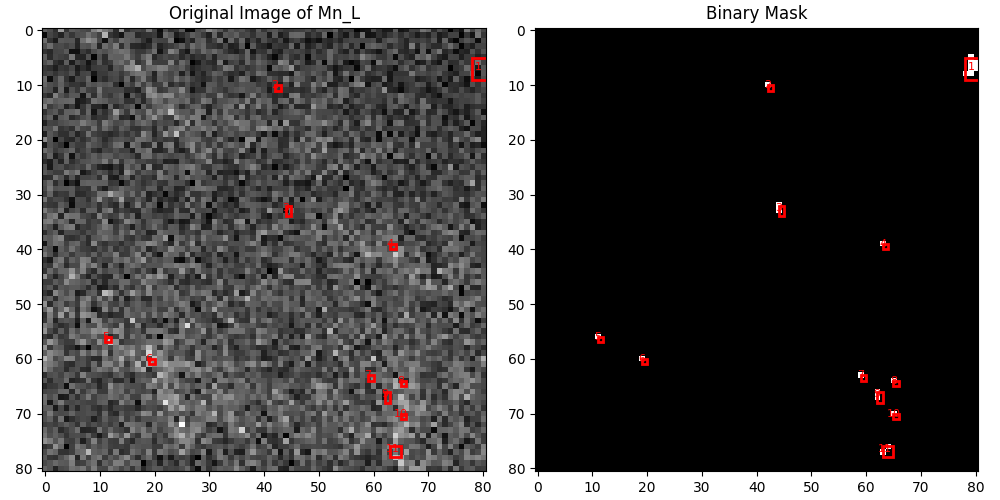

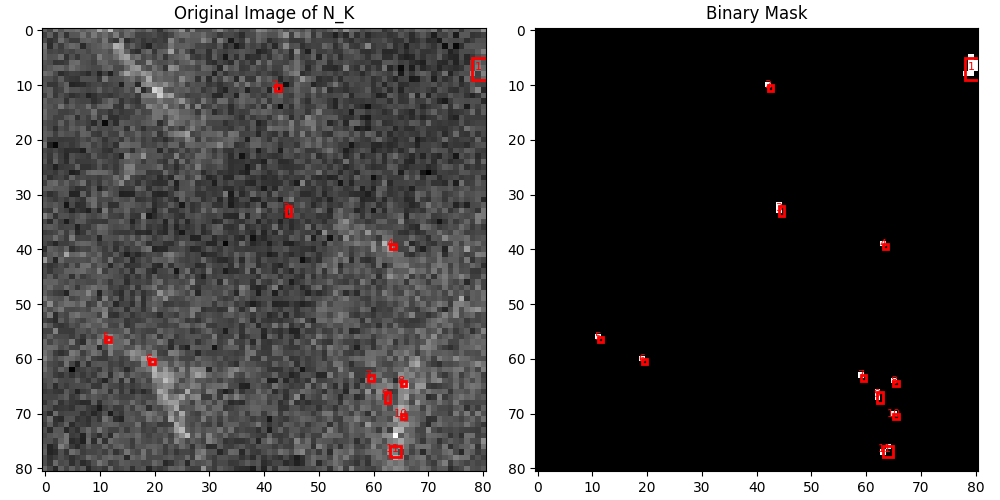

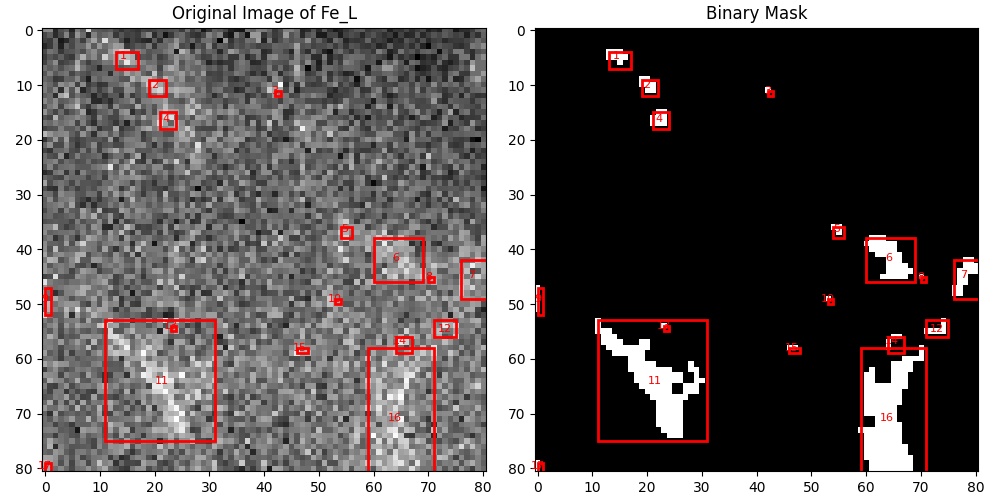

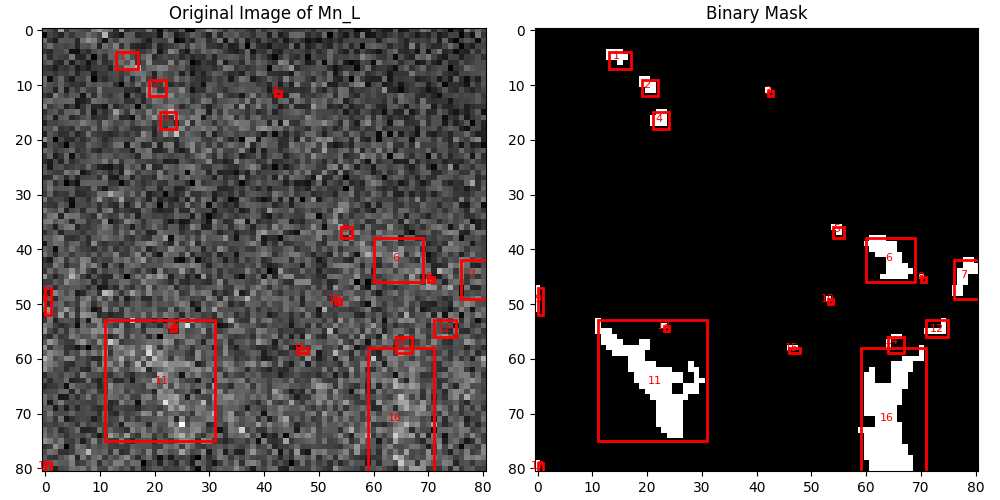

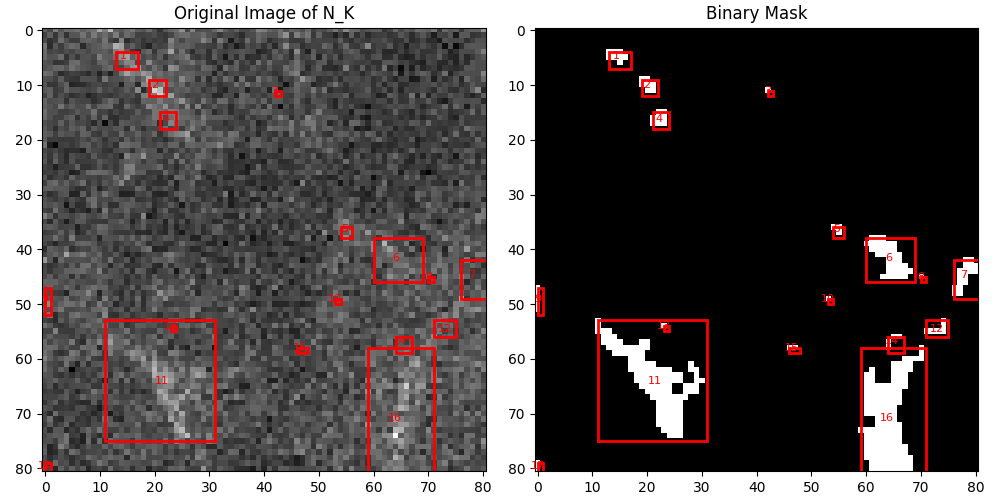

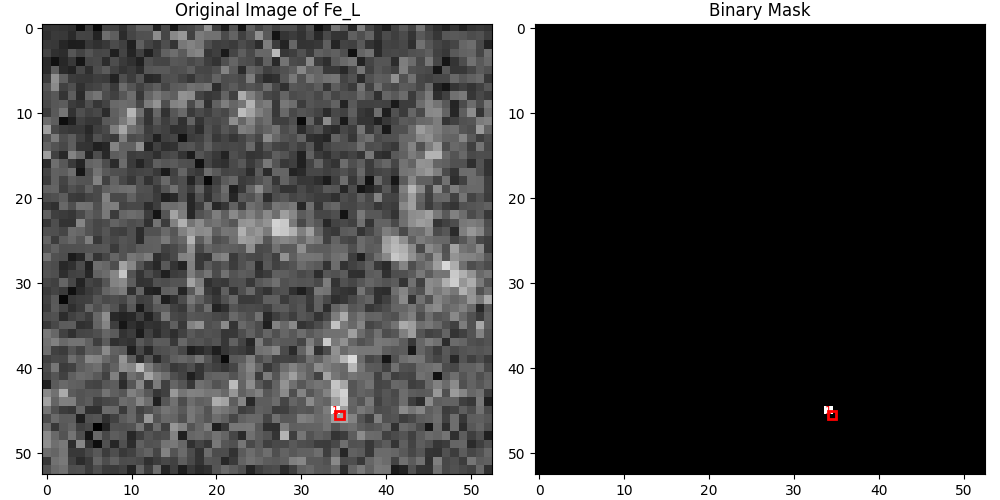

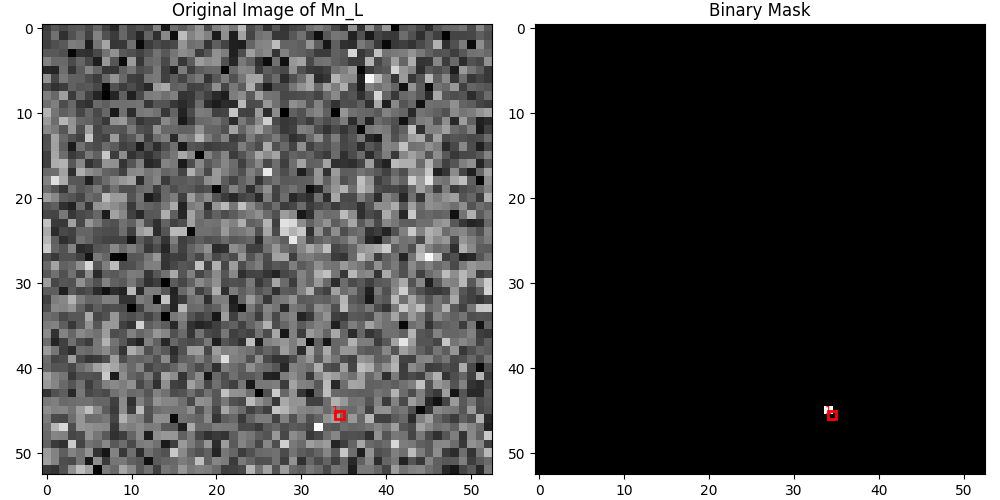

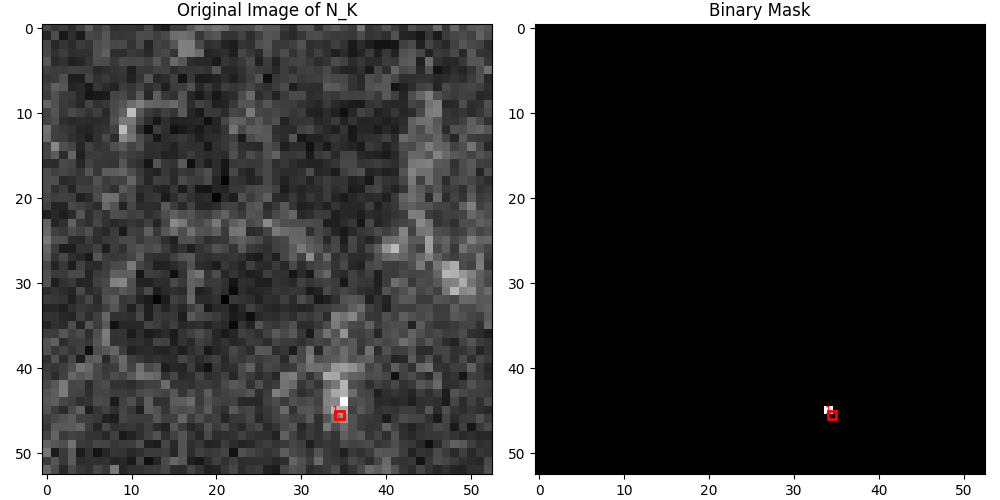

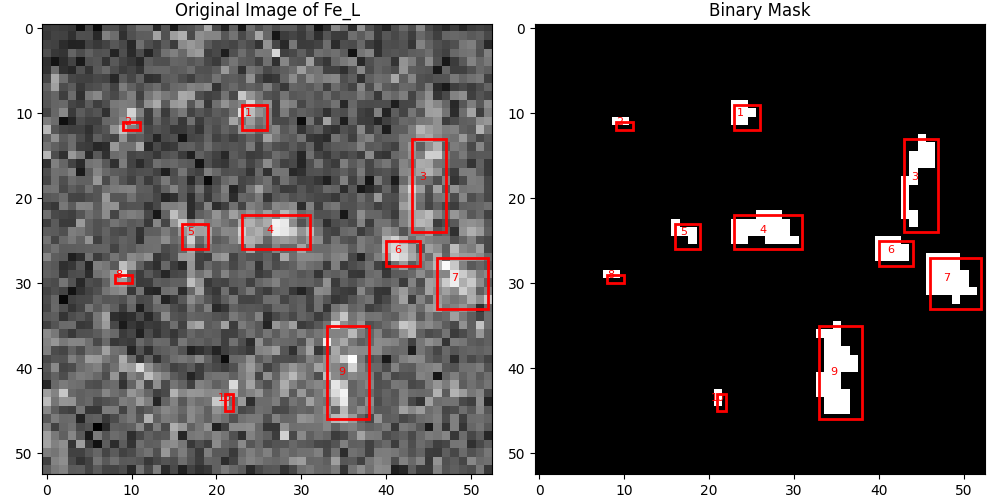

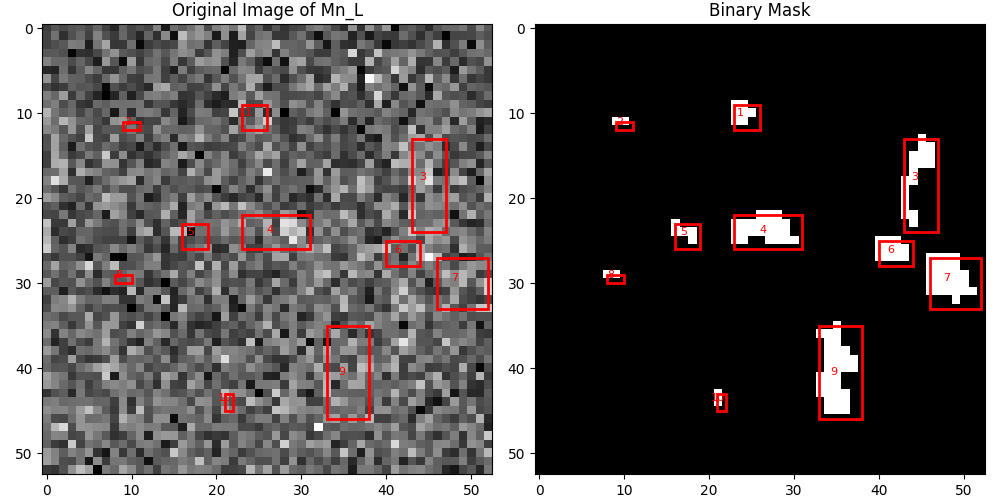

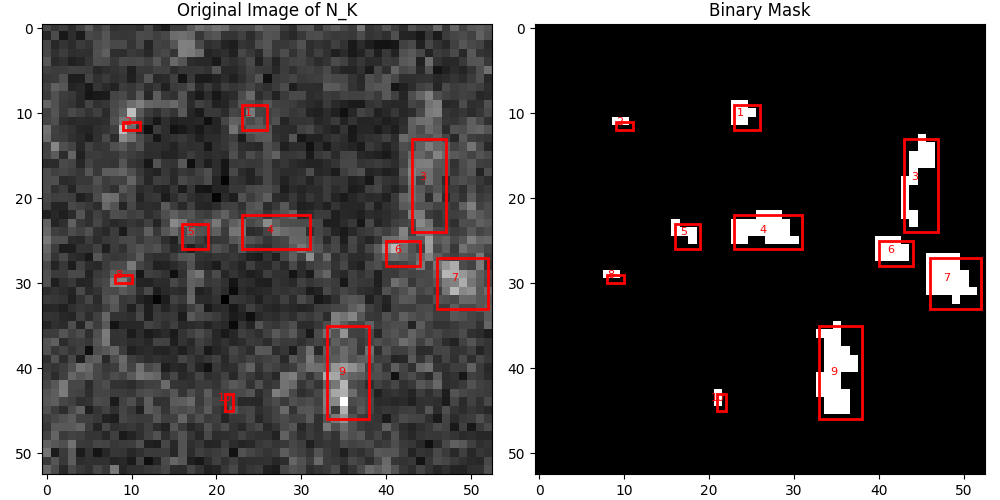

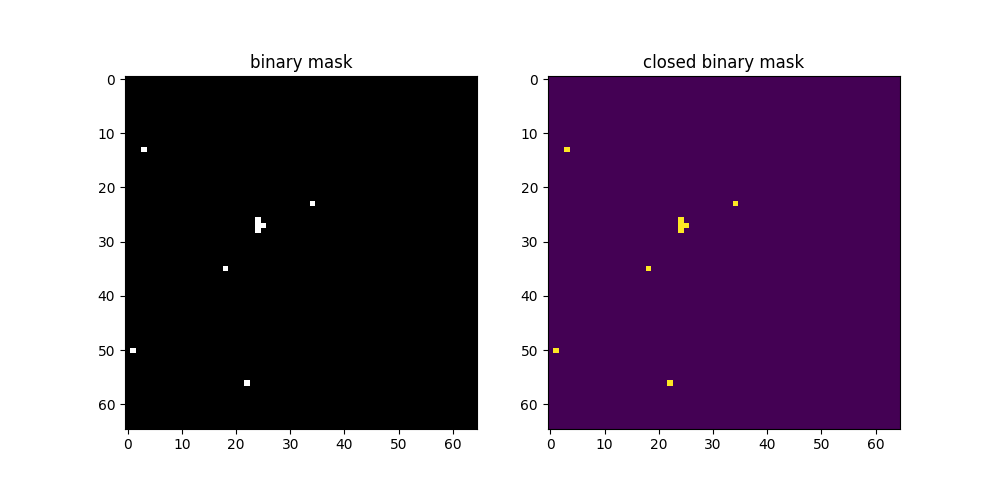

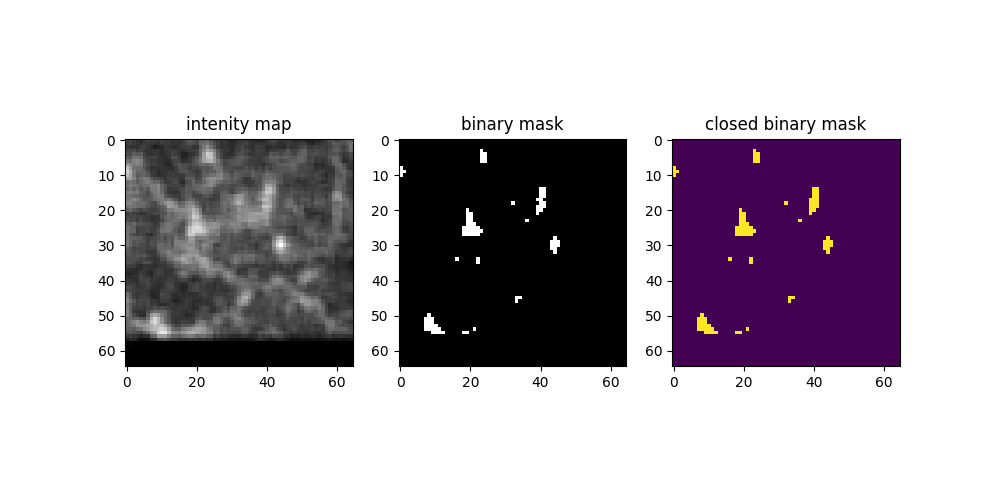

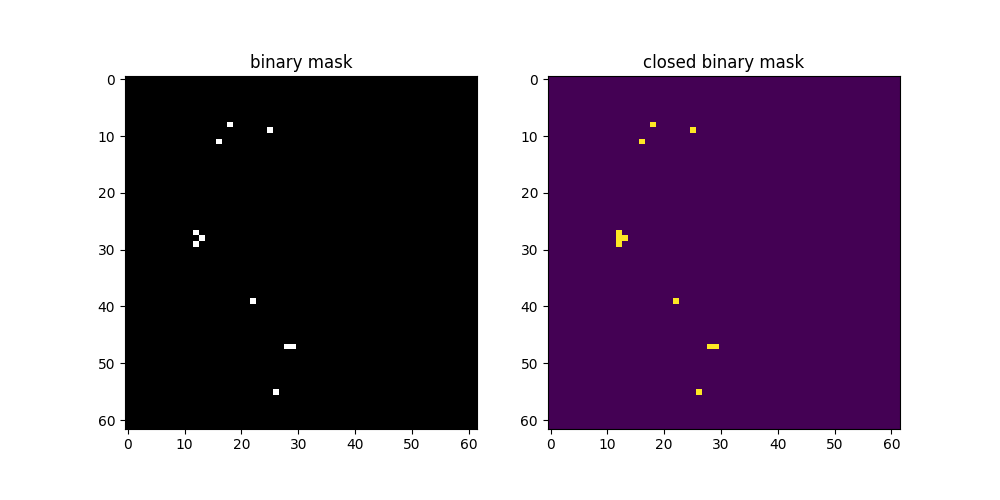

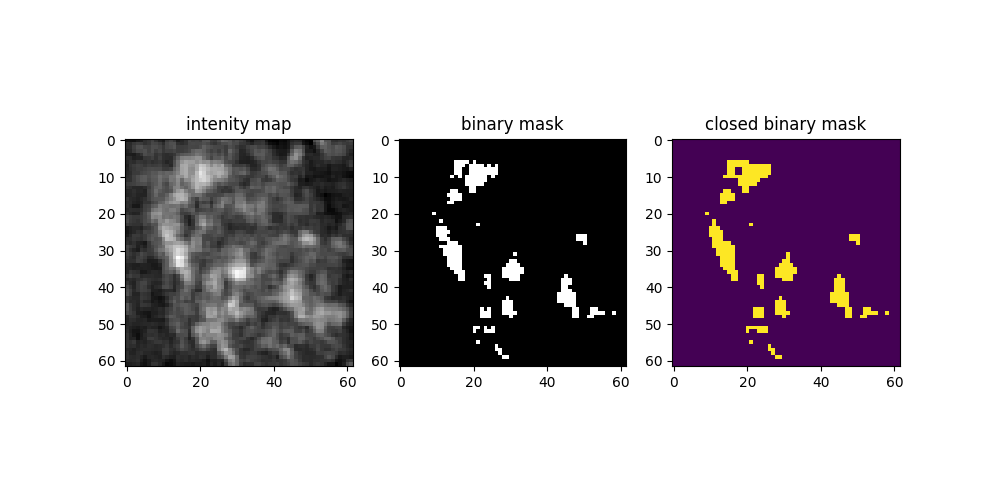

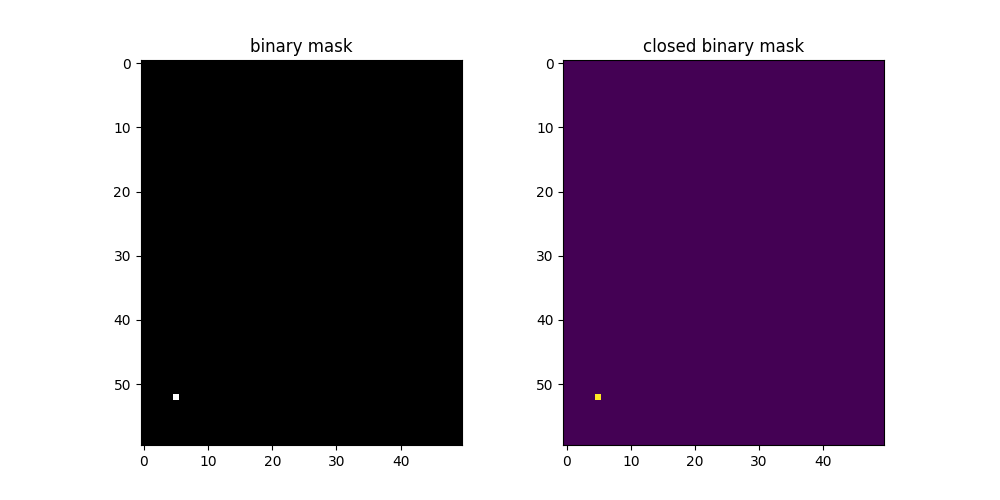

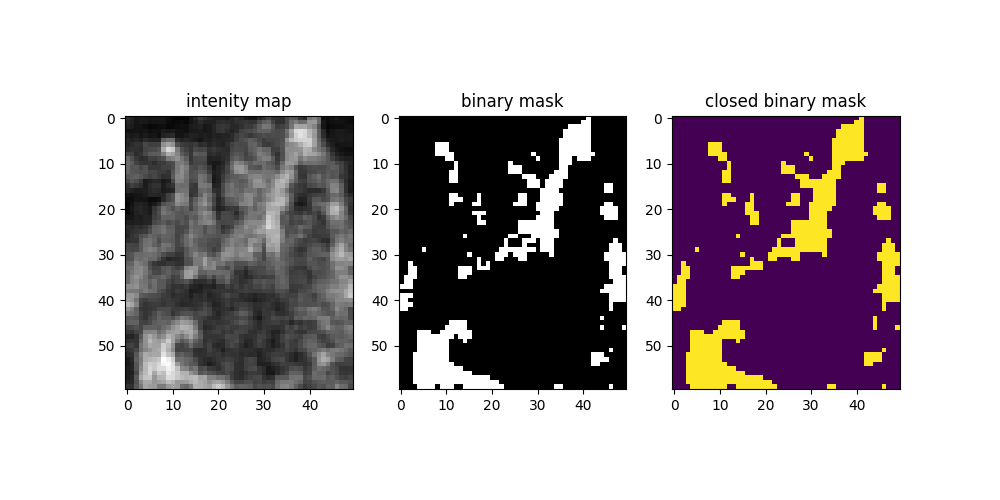

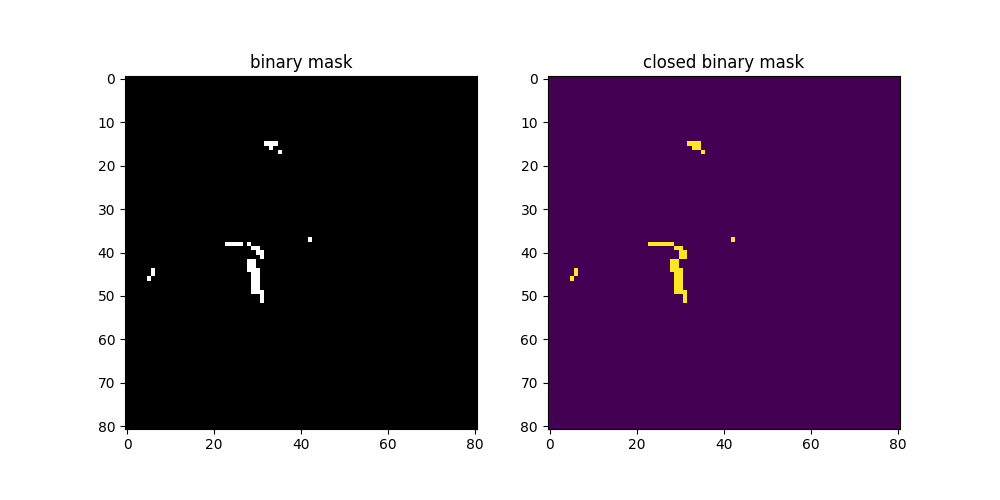

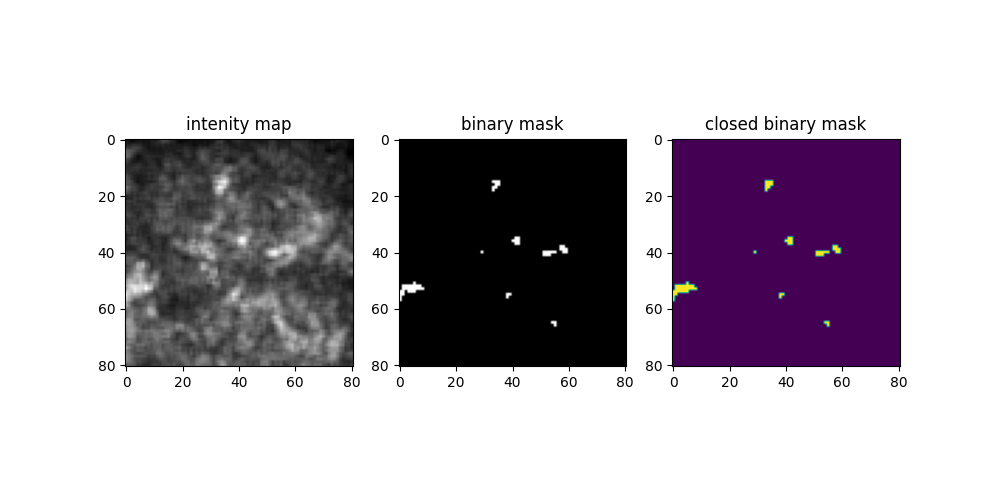

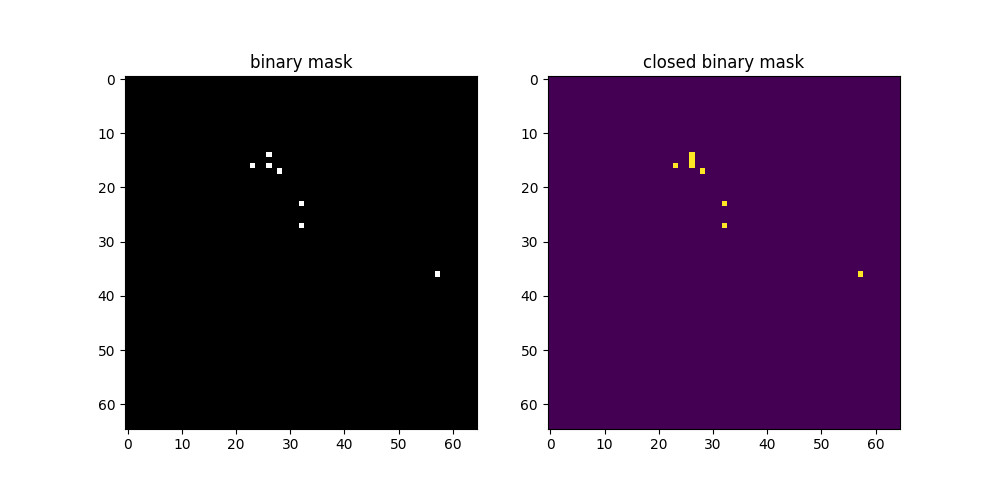

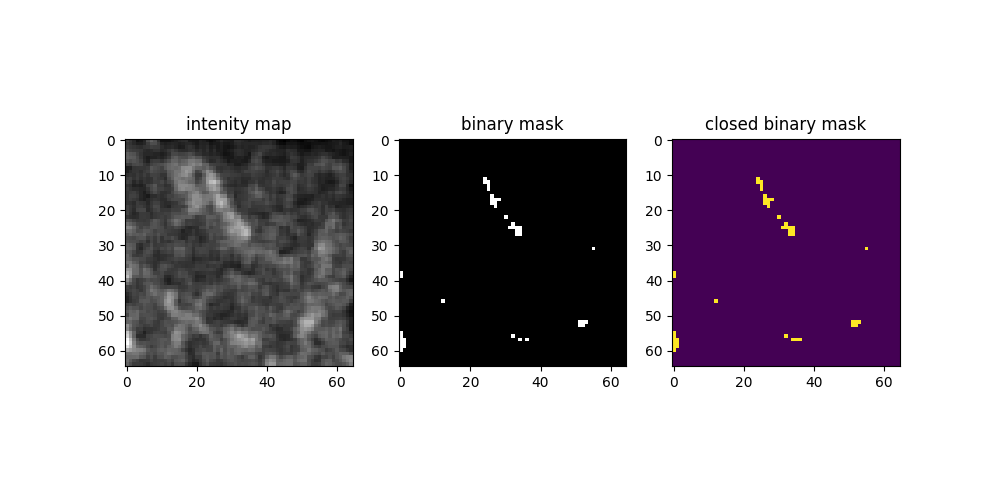

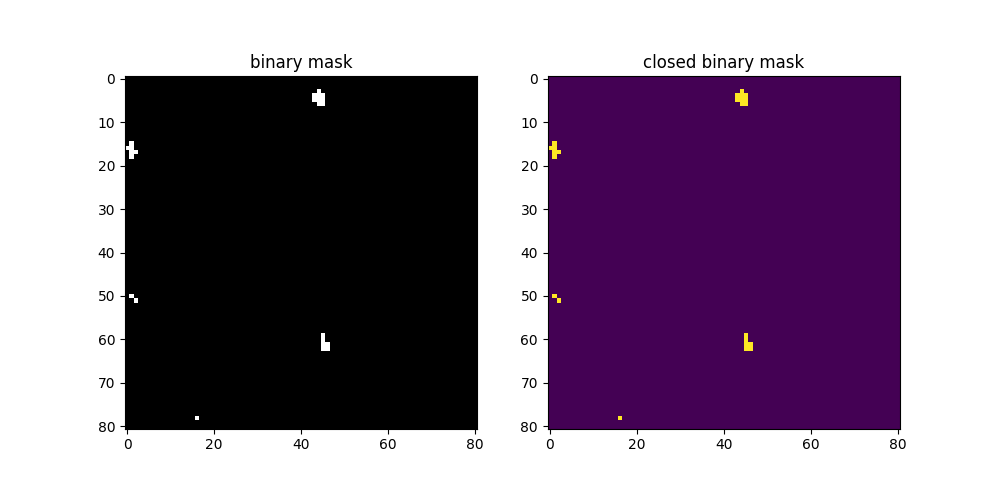

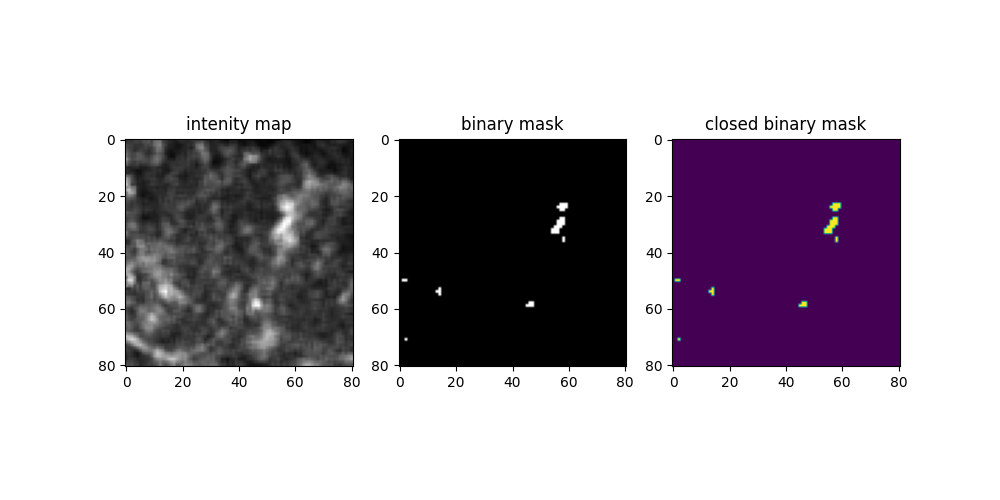

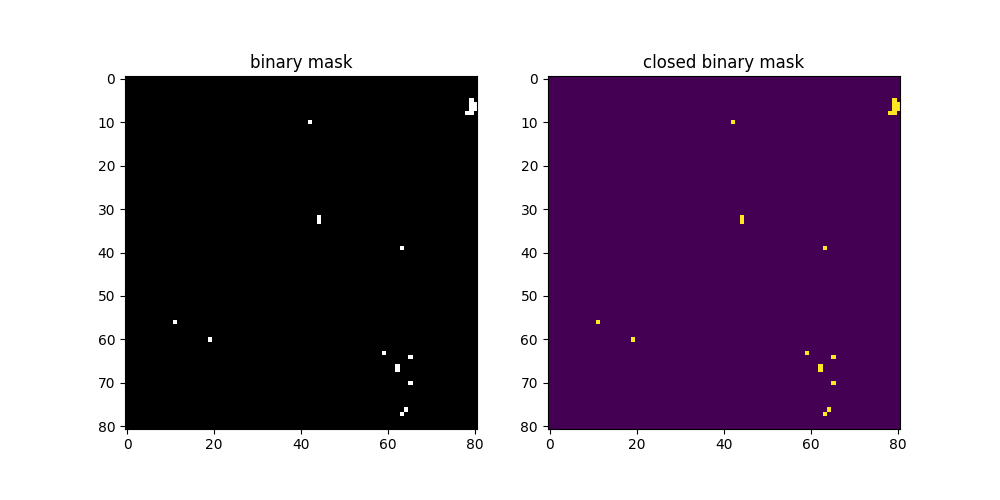

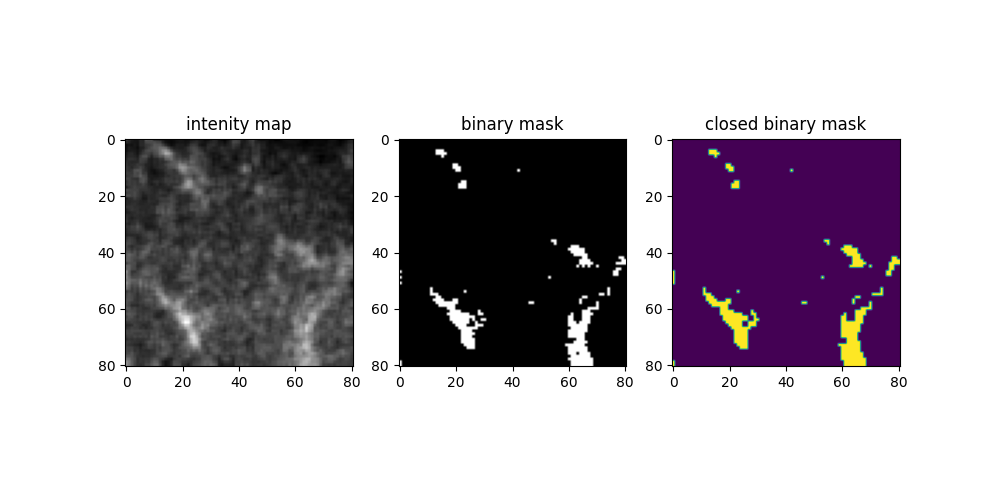

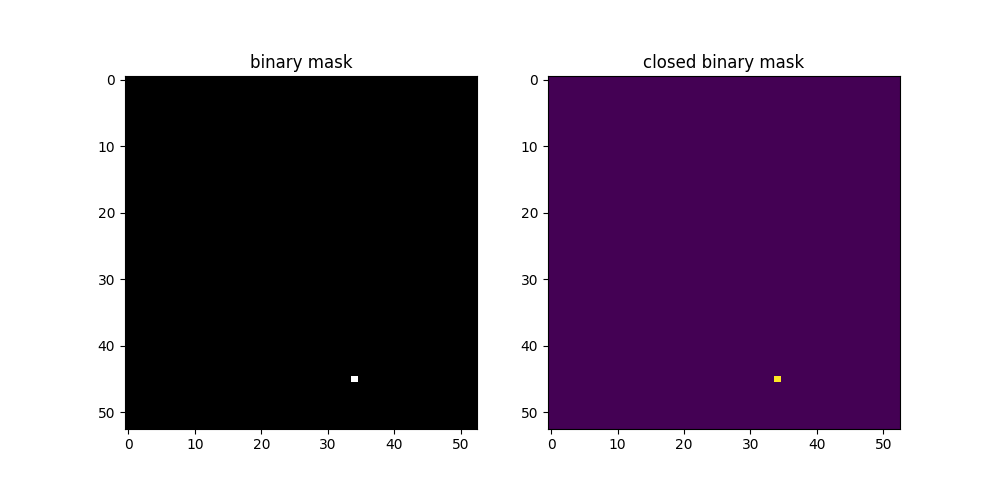

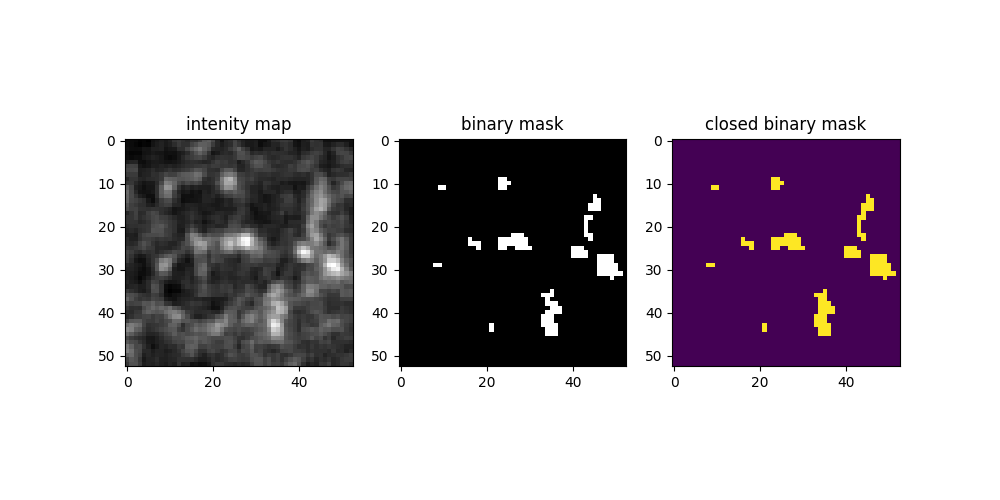

In [4]:
for sample in data_sets:

    f = h5.File(data_sets[sample],'r') #load the .h5 file

    from skimage import restoration
    #binary mask to generate for 'Fe_L' 
    mask_element = 'Fe_L'
    map = f['xrf_flat_scan_{}_aligned'.format(sample)]['xrf_fit']['results']['parameters'][mask_element] #access the signal location in the file
    if np.isnan(map).any:
        map = np.nan_to_num(map,nan=np.nanmin(map))
    
    #map = map - restoration.rolling_ball(map, radius=2)
    #map = convolve(map, np.array([np.ones(2) for i in range(2)]))
    #map = map**2
    
    
    #data_sqrd = np.array(map) **2 #multiply data with itself
    cutoffs = generate_cutoffs(map)
    
    ####PARAMETERS
    limit = optimal_cutoff(cutoffs) #intensity threshold ---limit is automatically set for this method---
    closing_value = 2 #pixel size for closing
    closing_bn = False #if True, closing mask becomes binary mask
    ######
    
    binary_mask = map > np.percentile(map, limit)
    
            
    closed_binary_mask = None  
    if closing_value > 0: #closing is optional
        closed_binary_mask = closing(binary_mask, square(closing_value))
    
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    axes[0].imshow(binary_mask, cmap='gray')
    axes[0].set_title("binary mask")
    
    if closed_binary_mask is not None:
        axes[1].imshow(closed_binary_mask)
        axes[1].set_title("closed binary mask")
        # binary_mask = closed_binary_mask
    
    if closing_bn == True:
        binary_mask = closed_binary_mask
    
    bckgrnd = map* np.invert(binary_mask)
    bckgrnd[bckgrnd==0]= np.median(map)
    
    bckgrnd = bckgrnd**2
    
    
    
    cutoffs_bckg = generate_cutoffs(bckgrnd)
    ####PARAMETERS
    kernel_size = 3
    limit_2 = optimal_cutoff(cutoffs_bckg) #intensity threshold ---limit is automatically set for this method---
    closing_value = 2 #pixel size for closing
    closing_bn = True #if True, closing mask becomes binary mask
    ######
    
    
    bckgrnd = convolve(bckgrnd, np.array([np.ones(kernel_size) for i in range(kernel_size)]))
    binary_mask_2 = bckgrnd > np.percentile(bckgrnd, limit_2)
    
            
    closed_binary_mask_2 = None  
    if closing_value > 0: #closing is optional
        closed_binary_mask_2 = closing(binary_mask_2, square(closing_value))
    
    fig, axes = plt.subplots(1,3, figsize=(10,5))
    
    axes[0].imshow(bckgrnd, cmap='gray')
    axes[0].set_title("intenity map")
    
    axes[1].imshow(binary_mask_2, cmap='gray')
    axes[1].set_title("binary mask")
    
    if closed_binary_mask is not None:
        axes[2].imshow(closed_binary_mask_2)
        axes[2].set_title("closed binary mask")
        # binary_mask = closed_binary_mask
    
    if closing_bn == True:
        binary_mask_2 = closed_binary_mask_2
    
    from skimage import io, filters, measure
    
    ####parameters####
    elements = [ 'Fe_L','Mn_L', 'N_K'] #specify the elements to work with
    area_limit = 0 #area size cutoff
    ####
    combined_df = [] #target for numerical values
    figs = {} #target for plots
    maps = {}
    for element in elements:#iterate through elements
        element_map = f['xrf_flat_scan_{}_aligned'.format(sample)]['xrf_fit']['results']['parameters'][element] #open data
        if np.isnan(element_map).any:
            element_map = np.nan_to_num(element_map,nan=np.nanmin(element_map))
        maps[element] = element_map
        labels = measure.label(binary_mask) #generate labels the masks
        properties = measure.regionprops(labels) #collect their properties
        #plot the elemental map...
        fig, axes = plt.subplots(1,2, figsize=(10,5))
        axes[0].imshow(element_map, cmap='gray')
        axes[0].set_title(f'Original Image of {element}')
        #...and plot the binary mask
        axes[1].imshow(binary_mask, cmap = 'gray')
        axes[1].set_title('Binary Mask')
        figs[element] = fig
        for prop in  properties: #access the properties of each area
            if prop.area > area_limit: #check that the area is over the specified limit
                minr, minc, maxr, maxc = prop.bbox #prepare the coordinates for the bounding boxes
                # Draw rectangles on the original image
                rect1 = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                     fill=False, edgecolor='red', linewidth=2)
                axes[0].add_patch(rect1)
    
                # Draw rectangles on the binary mask image
                rect2 = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                     fill=False, edgecolor='red', linewidth=2)
                axes[1].add_patch(rect2)
    
                # Annotate on the original image
                y, x = prop.centroid
                axes[0].text(x, y, prop.label, color='red', fontsize=8, ha='center', va='center')
    
                # Annotate on the blurred image
                axes[1].text(x, y, prop.label, color='red', fontsize=8, ha='center', va='center')
        #show the plot
        plt.tight_layout()
        plt.show()
        #collect the properties of the masks and assign them as keys for the numeric values for each area
        data = element_map
        roi_data = [
                {
                    'Label': prop.label,
                    'Area': prop.area,
                    'Mean': np.mean(data[prop.slice]),
                    'Min': np.min(data[prop.slice]),
                    'Max': np.max(data[prop.slice]),
                    'SD': np.std(data[prop.slice])
                }
                for prop in properties if prop.area>area_limit
            ]
        #generate a dataframe
        df = pd.DataFrame(roi_data, index=[prop['Label'] for prop in roi_data])
        combined_df.append(df) #and append them to a list
    out = dict(zip(elements,combined_df)) #finally generate a dict where the elements are keys and dataframes are values
    
    ratios = pd.DataFrame({
        f'{elements[0]} / {elements[1]}': out[elements[0]]['Mean'] / out[elements[1]]['Mean'],
        f'{elements[0]} / {elements[2]}': out[elements[0]]['Mean'] / out[elements[2]]['Mean']
    })
    
    
    from skimage import io, filters, measure
    
    ####parameters####
    elements = [  'Fe_L','Mn_L', 'N_K'] #specify the elements to work with
    area_limit = 0 #area size cutoff
    ####
    combined_df_2 = [] #target for numerical values
    figs_2 = {} #target for plots
    maps_2 = {}
    for element in elements:#iterate through elements
        element_map = f['xrf_flat_scan_{}_aligned'.format(sample)]['xrf_fit']['results']['parameters'][element]* np.invert(binary_mask) #open data
        if np.isnan(element_map).any:
            element_map = np.nan_to_num(element_map,nan=np.nanmin(element_map))
        element_map[element_map==0]= np.median(element_map)
        maps_2[element] = element_map
        labels = measure.label(binary_mask_2) #generate labels the masks
        properties = measure.regionprops(labels) #collect their properties
        #plot the elemental map...
        fig, axes = plt.subplots(1,2, figsize=(10,5))
        axes[0].imshow(element_map, cmap='gray')
        axes[0].set_title(f'Original Image of {element}')
        #...and plot the binary mask
        axes[1].imshow(binary_mask_2, cmap = 'gray')
        axes[1].set_title('Binary Mask')
        figs_2[element] = fig
        for prop in  properties: #access the properties of each area
            if prop.area > area_limit: #check that the area is over the specified limit
                minr, minc, maxr, maxc = prop.bbox #prepare the coordinates for the bounding boxes
                # Draw rectangles on the original image
                rect1 = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                     fill=False, edgecolor='red', linewidth=2)
                axes[0].add_patch(rect1)
    
                # Draw rectangles on the binary mask image
                rect2 = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                     fill=False, edgecolor='red', linewidth=2)
                axes[1].add_patch(rect2)
    
                # Annotate on the original image
                y, x = prop.centroid
                axes[0].text(x, y, prop.label, color='red', fontsize=8, ha='center', va='center')
    
                # Annotate on the blurred image
                axes[1].text(x, y, prop.label, color='red', fontsize=8, ha='center', va='center')
        #show the plot
        plt.tight_layout()
        plt.show()
        #collect the properties of the masks and assign them as keys for the numeric values for each area
        data = element_map
        roi_data = [
                {
                    'Label': prop.label,
                    'Area': prop.area,
                    'Mean': np.mean(data[prop.slice]),
                    'Min': np.min(data[prop.slice]),
                    'Max': np.max(data[prop.slice]),
                    'SD': np.std(data[prop.slice])
                }
                for prop in properties if prop.area>area_limit
            ]
        #generate a dataframe
        df = pd.DataFrame(roi_data, index=[prop['Label'] for prop in roi_data])
        combined_df_2.append(df) #and append them to a list
    out_2 = dict(zip(elements,combined_df_2)) #finally generate a dict where the elements are keys and dataframes are values
    
    ratios_2 = pd.DataFrame({
        f'{elements[0]} / {elements[1]}': out_2[elements[0]]['Mean'] / out_2[elements[1]]['Mean'],
        f'{elements[0]} / {elements[2]}': out_2[elements[0]]['Mean'] / out_2[elements[2]]['Mean']
    })
    

    
    save_location = f'Sample {sample} data output/cutoff'
    if not os.path.isdir(save_location.split('/')[0]):
        os.mkdir(save_location.split('/')[0])
    if not os.path.isdir(save_location):
        os.mkdir(save_location)
    
    
    
    document = Document()
    document.sections[0].left_margin = Inches(0.5)
    document.sections[0].right_margin = Inches(0.5)
    document.add_heading(f'Sample {sample} report', 0)
    document.add_heading('Binary Mask', 1)
    
    
    Image.fromarray(binary_mask).save(save_location +'/' + 'binary_image.png')
    document.add_picture(save_location +'/' + 'binary_image.png', width=Inches(5))
    last_paragraph = document.paragraphs[-1] 
    last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
    document.add_paragraph(f'binary image generated from {mask_element} signal')
    document.add_paragraph(f'signal limit was {round(limit,4)} th percentile')
    
    document.add_page_break()
    
    for element in elements:
        document.add_heading(f'{element} signal',1)
        document.add_paragraph(f'identified {element} accumulations')
        figs[element].savefig(save_location+'/'+f'{element}.png')
        document.add_picture(save_location+'/'+f'{element}.png', width=Inches(7))
        last_paragraph = document.paragraphs[-1] 
        last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

        tiff.imsave(f"{save_location}/{element}_map.tiff", np.array(maps[element]))
        tiff.imsave(f"{save_location}/{element}_map2.tiff", np.array(maps_2[element]))
    
        data = out[element]
    
        table = document.add_table(rows=1, cols=len(out[element].columns))
        table.style = 'Table Grid'
    
        #add header
        hdr_cells = table.rows[0].cells
        hdr_cells[0].text = 'Label'
        hdr_cells[1].text = 'Area'
        hdr_cells[2].text = 'Mean'
        hdr_cells[3].text = 'Min'
        hdr_cells[4].text = 'Max'
        hdr_cells[5].text = 'SD'
            
        for rows in data.values.tolist():
            row_cells = table.add_row().cells
            row_cells[0].text= str(int(rows[0]))
            row_cells[1].text= str(int(rows[1]))
            row_cells[2].text= str(round(rows[2],3))
            row_cells[3].text= str(round(rows[3],3))
            row_cells[4].text= str(round(rows[4], 3))
            row_cells[5].text= str(round(rows[5],3))
        document.add_page_break()
        
    document.add_heading(f"Ratios of {elements[0]} with other elements", 1)
    table2 = document.add_table(rows=1, cols=2)
    table2.style= 'Table Grid'
    
    hdr_cells2 = table2.rows[0].cells
    hdr_cells2[0].text = f'{elements[0]} / {elements[1]}'
    hdr_cells2[1].text = f'{elements[0]} / {elements[2]}'
    
    for rows in ratios.values:
        row_cells2 = table2.add_row().cells
        row_cells2[0].text = str(round(rows[0],3))
        row_cells2[1].text = str(round(rows[1],3))
        
    document.add_page_break()
    document.add_heading("Calculations", 1)
    table3 = document.add_table(rows=1, cols=3)
    table3.style= 'Table Grid'
    
    hdr_cells3 = table3.rows[0].cells
    hdr_cells3[0].text = 'Element'
    hdr_cells3[1].text = 'Mean'
    hdr_cells3[2].text = 'SD'
    for element in elements:
        row_cells3 = table3.add_row().cells
        row_cells3[0].text = element.split('_')[0]
        row_cells3[1].text = str(round(out[element]['Mean'].mean(),3))
        row_cells3[2].text = str(round(out[element]['Mean'].std(),3))
    

    
    
    document.save(save_location+'/'+f'Sample_{sample}_report_cutoff.docx')
    
    
    
    document = Document()
    document.sections[0].left_margin = Inches(0.5)
    document.sections[0].right_margin = Inches(0.5)
    document.add_heading(f'Sample {sample} report', 0)
    document.add_heading('Binary Mask', 1)
    
    
    Image.fromarray(binary_mask_2).save(save_location +'/' + 'binary_image_2.png')
    document.add_picture(save_location +'/' + 'binary_image_2.png', width=Inches(5))
    last_paragraph = document.paragraphs[-1] 
    last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
    document.add_paragraph(f'binary image generated from {mask_element} signal')
    document.add_paragraph(f'signal limit was {round(limit_2,4)} th percentile.')
    document.add_paragraph(f'convolution was performed with a mean filter, with a kernel size of {kernel_size}')
    
    document.add_page_break()
    
    for element in elements:
        document.add_heading(f'{element} signal',1)
        document.add_paragraph(f'identified {element} accumulations')
        figs_2[element].savefig(save_location+'/'+f'{element}_2.png')
        document.add_picture(save_location+'/'+f'{element}_2.png', width=Inches(7))
        last_paragraph = document.paragraphs[-1] 
        last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
    
        data = out_2[element]
    
        table = document.add_table(rows=1, cols=len(out_2[element].columns))
        table.style = 'Table Grid'
    
        #add header
        hdr_cells = table.rows[0].cells
        hdr_cells[0].text = 'Label'
        hdr_cells[1].text = 'Area'
        hdr_cells[2].text = 'Mean'
        hdr_cells[3].text = 'Min'
        hdr_cells[4].text = 'Max'
        hdr_cells[5].text = 'SD'
            
        for rows in data.values.tolist():
            row_cells = table.add_row().cells
            row_cells[0].text= str(int(rows[0]))
            row_cells[1].text= str(int(rows[1]))
            row_cells[2].text= str(round(rows[2],3))
            row_cells[3].text= str(round(rows[3],3))
            row_cells[4].text= str(round(rows[4], 3))
            row_cells[5].text= str(round(rows[5],3))
        document.add_page_break()
        
    document.add_heading(f"Ratios of {elements[0]} with other elements", 1)
    table2 = document.add_table(rows=1, cols=2)
    table2.style= 'Table Grid'
    
    hdr_cells2 = table2.rows[0].cells
    hdr_cells2[0].text = f'{elements[0]} / {elements[1]}'
    hdr_cells2[1].text = f'{elements[0]} / {elements[2]}'
    
    for rows in ratios_2.values:
        row_cells2 = table2.add_row().cells
        row_cells2[0].text = str(round(rows[0],3))
        row_cells2[1].text = str(round(rows[1],3))
        
    document.add_page_break()
    document.add_heading("Calculations", 1)
    table3 = document.add_table(rows=1, cols=3)
    table3.style= 'Table Grid'
    
    hdr_cells3 = table3.rows[0].cells
    hdr_cells3[0].text = 'Element'
    hdr_cells3[1].text = 'Mean'
    hdr_cells3[2].text = 'SD'
    for element in elements:
        row_cells3 = table3.add_row().cells
        row_cells3[0].text = element.split('_')[0]
        row_cells3[1].text = str(round(out_2[element]['Mean'].mean(),3))
        row_cells3[2].text = str(round(out_2[element]['Mean'].std(),3))
    
    
    
    
    document.save(save_location+'/'+f'Sample_{sample}_report_cutoff_background.docx')
